In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import warnings
from plotly.subplots import make_subplots
import plotly.graph_objects as go
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
df.loc[(df.Attrition=='Yes') & (df.Department=='Sales')]

Age Attrition     BusinessTravel  DailyRate Department  \
0      41       Yes      Travel_Rarely       1102      Sales   
21     36       Yes      Travel_Rarely       1218      Sales   
33     39       Yes      Travel_Rarely        895      Sales   
36     50       Yes      Travel_Rarely        869      Sales   
89     46       Yes      Travel_Rarely        669      Sales   
...   ...       ...                ...        ...        ...   
1395   31       Yes  Travel_Frequently        754      Sales   
1396   53       Yes      Travel_Rarely       1168      Sales   
1438   23       Yes  Travel_Frequently        638      Sales   
1452   50       Yes  Travel_Frequently        878      Sales   
1461   50       Yes      Travel_Rarely        410      Sales   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
0                    1          2     Life Sciences              1   
21                   9          4     Life Sciences              1   
33                   5          3  Technical Degree              1   
36                   3          2         Marketing              1   
89                   9          2           Medical              1   
...                ...        ...               ...            ...   
1395                26          4         Marketing              1   
1396                24          4     Life Sciences              1   
1438                 9          3         Marketing              1   
1452                 1          4     Life Sciences              1   
1461                28          3         Marketing              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
21                27  ...                         2            80   
33                42  ...                         3            80   
36                47  ...                         3            80   
89               118  ...                         4            80   
...              ...  ...                       ...           ...   
1395            1967  ...                         3            80   
1396            1968  ...                         2            80   
1438            2023  ...                         1            80   
1452            2044  ...                         4            80   
1461            2055  ...                         2            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
21                   0                 10                      4   
33                   1                 19                      6   
36                   0                  3                      2   
89                   0                  9                      3   
...                ...                ...                    ...   
1395                 0                 10                      4   
1396                 0                 15                      2   
1438                 1                  1                      3   
1452                 2                 12                      3   
1461                 1                 20                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
21                 3               5                  3   
33                 4               1                  0   
36                 3               3                  2   
89                 3               9                  8   
...              ...             ...                ...   
1395               3              10                  7   
1396               2               2                  2   
1438               2               1                  0   
1452               3               6                  3   
1461               3               3                  2   

      YearsSinceLastPromotion  YearsWithC

In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
for i in range(0,df.shape[1]):
    n_miss=df.iloc[:,i].isnull().sum()
    perc=(n_miss/df.shape[0])*100
    print('>%d,Missing:%d,(%1.1f%%)'%(i,n_miss,perc))

>0,Missing:0,(0.0%)
>1,Missing:0,(0.0%)
>2,Missing:0,(0.0%)
>3,Missing:0,(0.0%)
>4,Missing:0,(0.0%)
>5,Missing:0,(0.0%)
>6,Missing:0,(0.0%)
>7,Missing:0,(0.0%)
>8,Missing:0,(0.0%)
>9,Missing:0,(0.0%)
>10,Missing:0,(0.0%)
>11,Missing:0,(0.0%)
>12,Missing:0,(0.0%)
>13,Missing:0,(0.0%)
>14,Missing:0,(0.0%)
>15,Missing:0,(0.0%)
>16,Missing:0,(0.0%)
>17,Missing:0,(0.0%)
>18,Missing:0,(0.0%)
>19,Missing:0,(0.0%)
>20,Missing:0,(0.0%)
>21,Missing:0,(0.0%)
>22,Missing:0,(0.0%)
>23,Missing:0,(0.0%)
>24,Missing:0,(0.0%)
>25,Missing:0,(0.0%)
>26,Missing:0,(0.0%)
>27,Missing:0,(0.0%)
>28,Missing:0,(0.0%)
>29,Missing:0,(0.0%)
>30,Missing:0,(0.0%)
>31,Missing:0,(0.0%)
>32,Missing:0,(0.0%)
>33,Missing:0,(0.0%)
>34,Missing:0,(0.0%)


In [9]:
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [10]:
df['Age_Group']=pd.cut(df['Age'],bins=[19,25,35,60,100],labels=['Very_Young','Young','Middle_Age','Senior_Citizen'])

In [11]:
df['Age_Group'].value_counts()

Middle_Age        741
Young             606
Very_Young        106
Senior_Citizen      0
Name: Age_Group, dtype: int64

In [12]:
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1], dtype=int64)

In [13]:
categorical=list(df.select_dtypes(exclude=[np.number]))
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Age_Group']

In [14]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [15]:
df['Gender']=np.where(df['Gender']=='Male',1,0)

In [16]:
df['Gender'].value_counts()

1    882
0    588
Name: Gender, dtype: int64

In [17]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [18]:
numerical_cols=list(df.select_dtypes(include='number').columns)
numerical_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [19]:
len(numerical_cols)

27

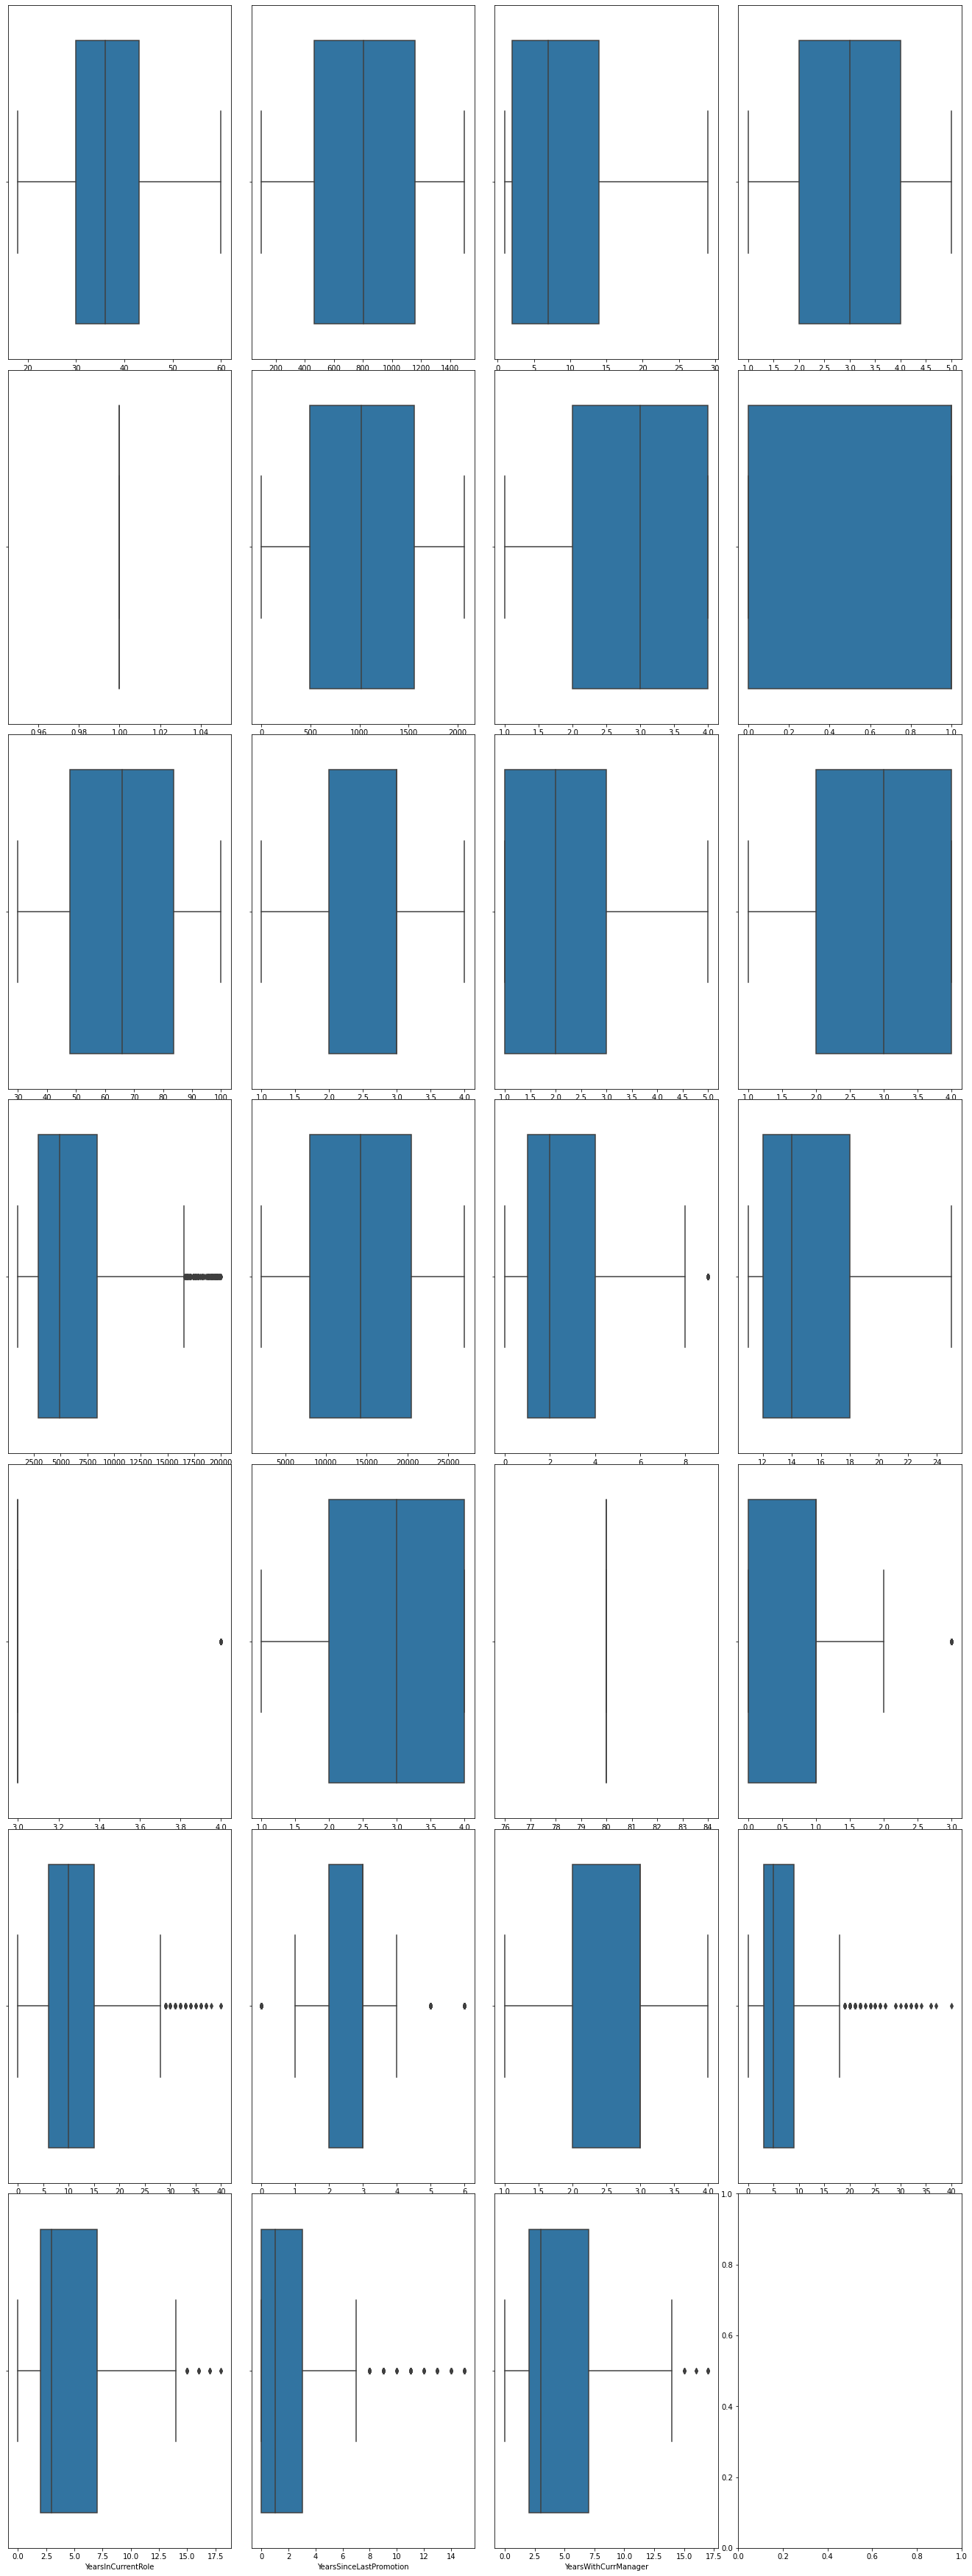

In [20]:
fig,axes=plt.subplots(nrows=7,ncols=4,constrained_layout=True)
fig.subplots_adjust(left=0,bottom=0,right=3,top=12,wspace=0.09,hspace=0.03)

for cols,ax in zip(numerical_cols,axes.flatten()):
    sn.boxplot(df[cols],ax=ax)

In [21]:
df['Attrition']=np.where(df['Attrition']=='Yes',1,0)

In [22]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [23]:
Attrition0=df.loc[df.Attrition==0]
Attrition1=df.loc[df.Attrition==1]

In [24]:
round(len(Attrition0)/len(Attrition1))

5

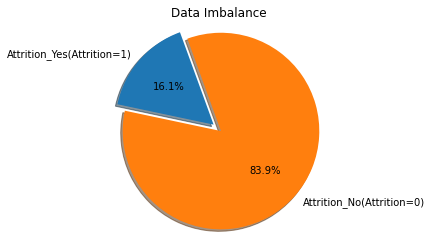

In [25]:
count0=0
count1=0

for i in df['Attrition'].values:
    if i==1:
        count1+=1
    else:
        count0+=1
        
count1=(count1/len(df['Attrition']))*100
count0=(count0/len(df['Attrition']))*100

x=['Attrition_Yes(Attrition=1)','Attrition_No(Attrition=0)']
y=[count1,count0]

explode=(0,0.1)
fig,ax1=plt.subplots()
ax1.pie(y,explode=explode,labels=x,autopct='%1.1f%%',
                              shadow=True,startangle=110)
ax1.axis('equal')
plt.title('Data Imbalance')
plt.show()
        

In [26]:
categorical_cols=list(df.select_dtypes(exclude=[np.number]))
categorical_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Age_Group']

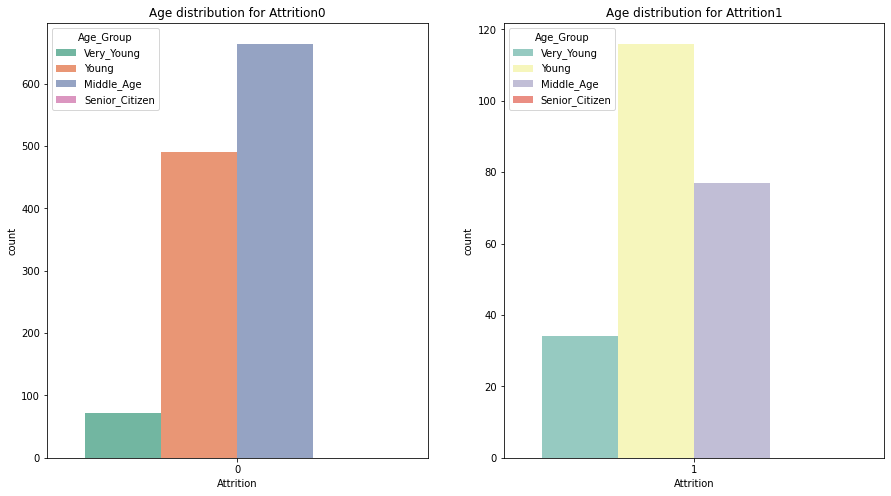

In [27]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sn.countplot(x='Attrition',data=Attrition0,hue='Age_Group',palette='Set2')
plt.title('Age distribution for Attrition0')
plt.subplot(122)
sn.countplot(x='Attrition',data=Attrition1,hue='Age_Group',palette='Set3')
plt.title('Age distribution for Attrition1')
plt.show()

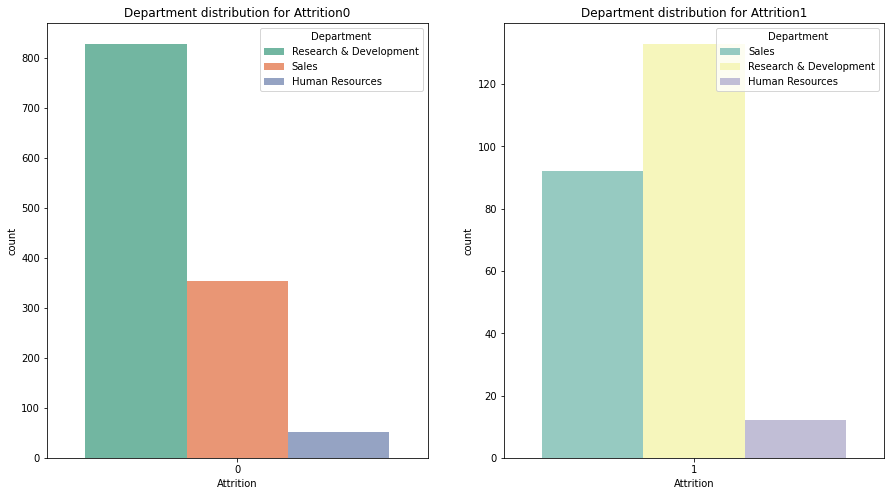

In [28]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sn.countplot(x='Attrition',data=Attrition0,hue='Department',palette='Set2')
plt.title('Department distribution for Attrition0')
plt.subplot(122)
sn.countplot(x='Attrition',data=Attrition1,hue='Department',palette='Set3')
plt.title('Department distribution for Attrition1')
plt.show()

In [29]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

<Figure size 1440x144 with 0 Axes>

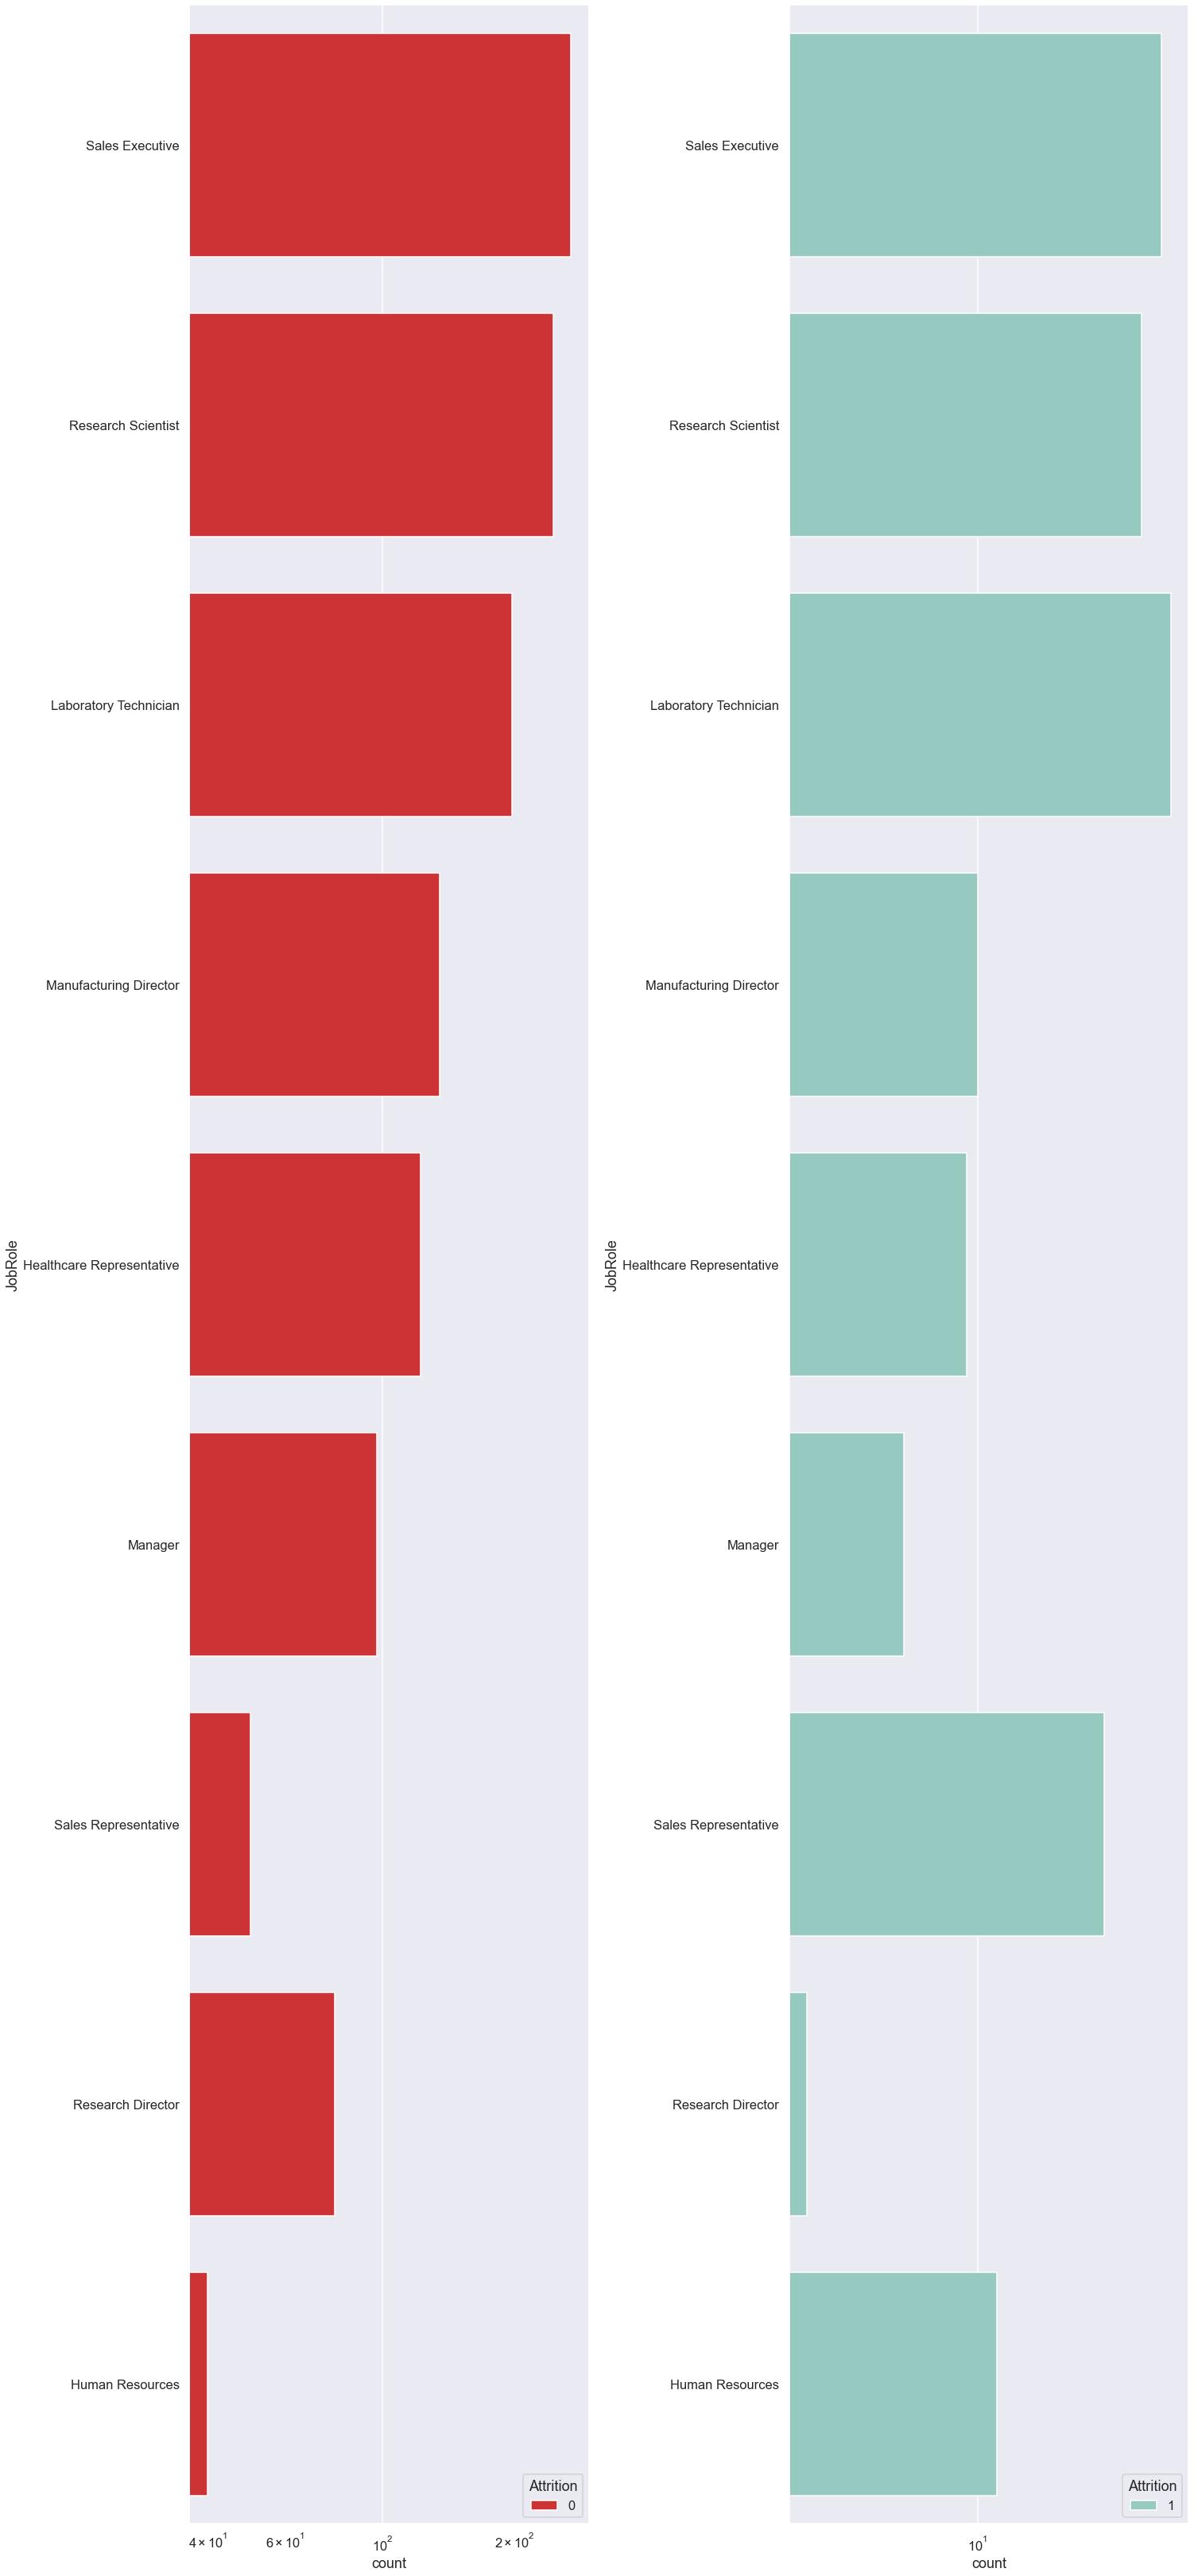

In [30]:
plt.figure(figsize=(20,2))
plt.rcParams['axes.labelsize']=40
plt.rcParams['axes.titlesize']=40
plt.rcParams['axes.titlepad']=40
sn.set_style('darkgrid')
sn.set_context('talk')
fig,axes=plt.subplots(nrows=1,ncols=2)
fig.subplots_adjust(left=0.09,bottom=1,right=3,top=12,wspace=0.5,hspace=0.3)
plt.subplot(121)
plt.xscale('log')
sn.countplot(data=Attrition0,y='JobRole',order=df['JobRole'].value_counts().index,palette='Set1',hue='Attrition')

plt.subplot(122)
plt.xscale('log')
sn.countplot(data=Attrition1,y='JobRole',order=df['JobRole'].value_counts().index,palette='Set3',hue='Attrition')
plt.show()

In [31]:
def categorical_plot(cols):
    plt.figure(figsize=(30,30))
    
    plt.rcParams['axes.labelpad']=50
    plt.subplot(121)
    sn.countplot(cols,data=Attrition0,palette='Set2',hue='Attrition')
    plt.xlabel(cols,fontsize=30,fontweight='bold')
    plt.ylabel('No Attrition',fontsize=30,fontweight='bold')
    plt.xticks(rotation=90,fontsize=30)
    plt.yticks(rotation=360,fontsize=30)
    
    plt.rcParams['axes.labelpad']=50
    plt.subplot(122)
    sn.countplot(cols,data=Attrition1,palette='Set1',hue='Attrition')
    plt.xlabel(cols,fontsize=30,fontweight='bold')
    plt.ylabel('Yes Attrition',fontsize=30,fontweight='bold')
    plt.xticks(rotation=90,fontsize=30)
    plt.yticks(rotation=360,fontsize=30)
    
    plt.show()

In [32]:
categorical_cols=list(df.select_dtypes(exclude=[np.number]))
categorical_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Age_Group']

In [33]:
categorical_cols.remove('Department')
categorical_cols.remove('JobRole')
categorical_cols.remove('Age_Group')

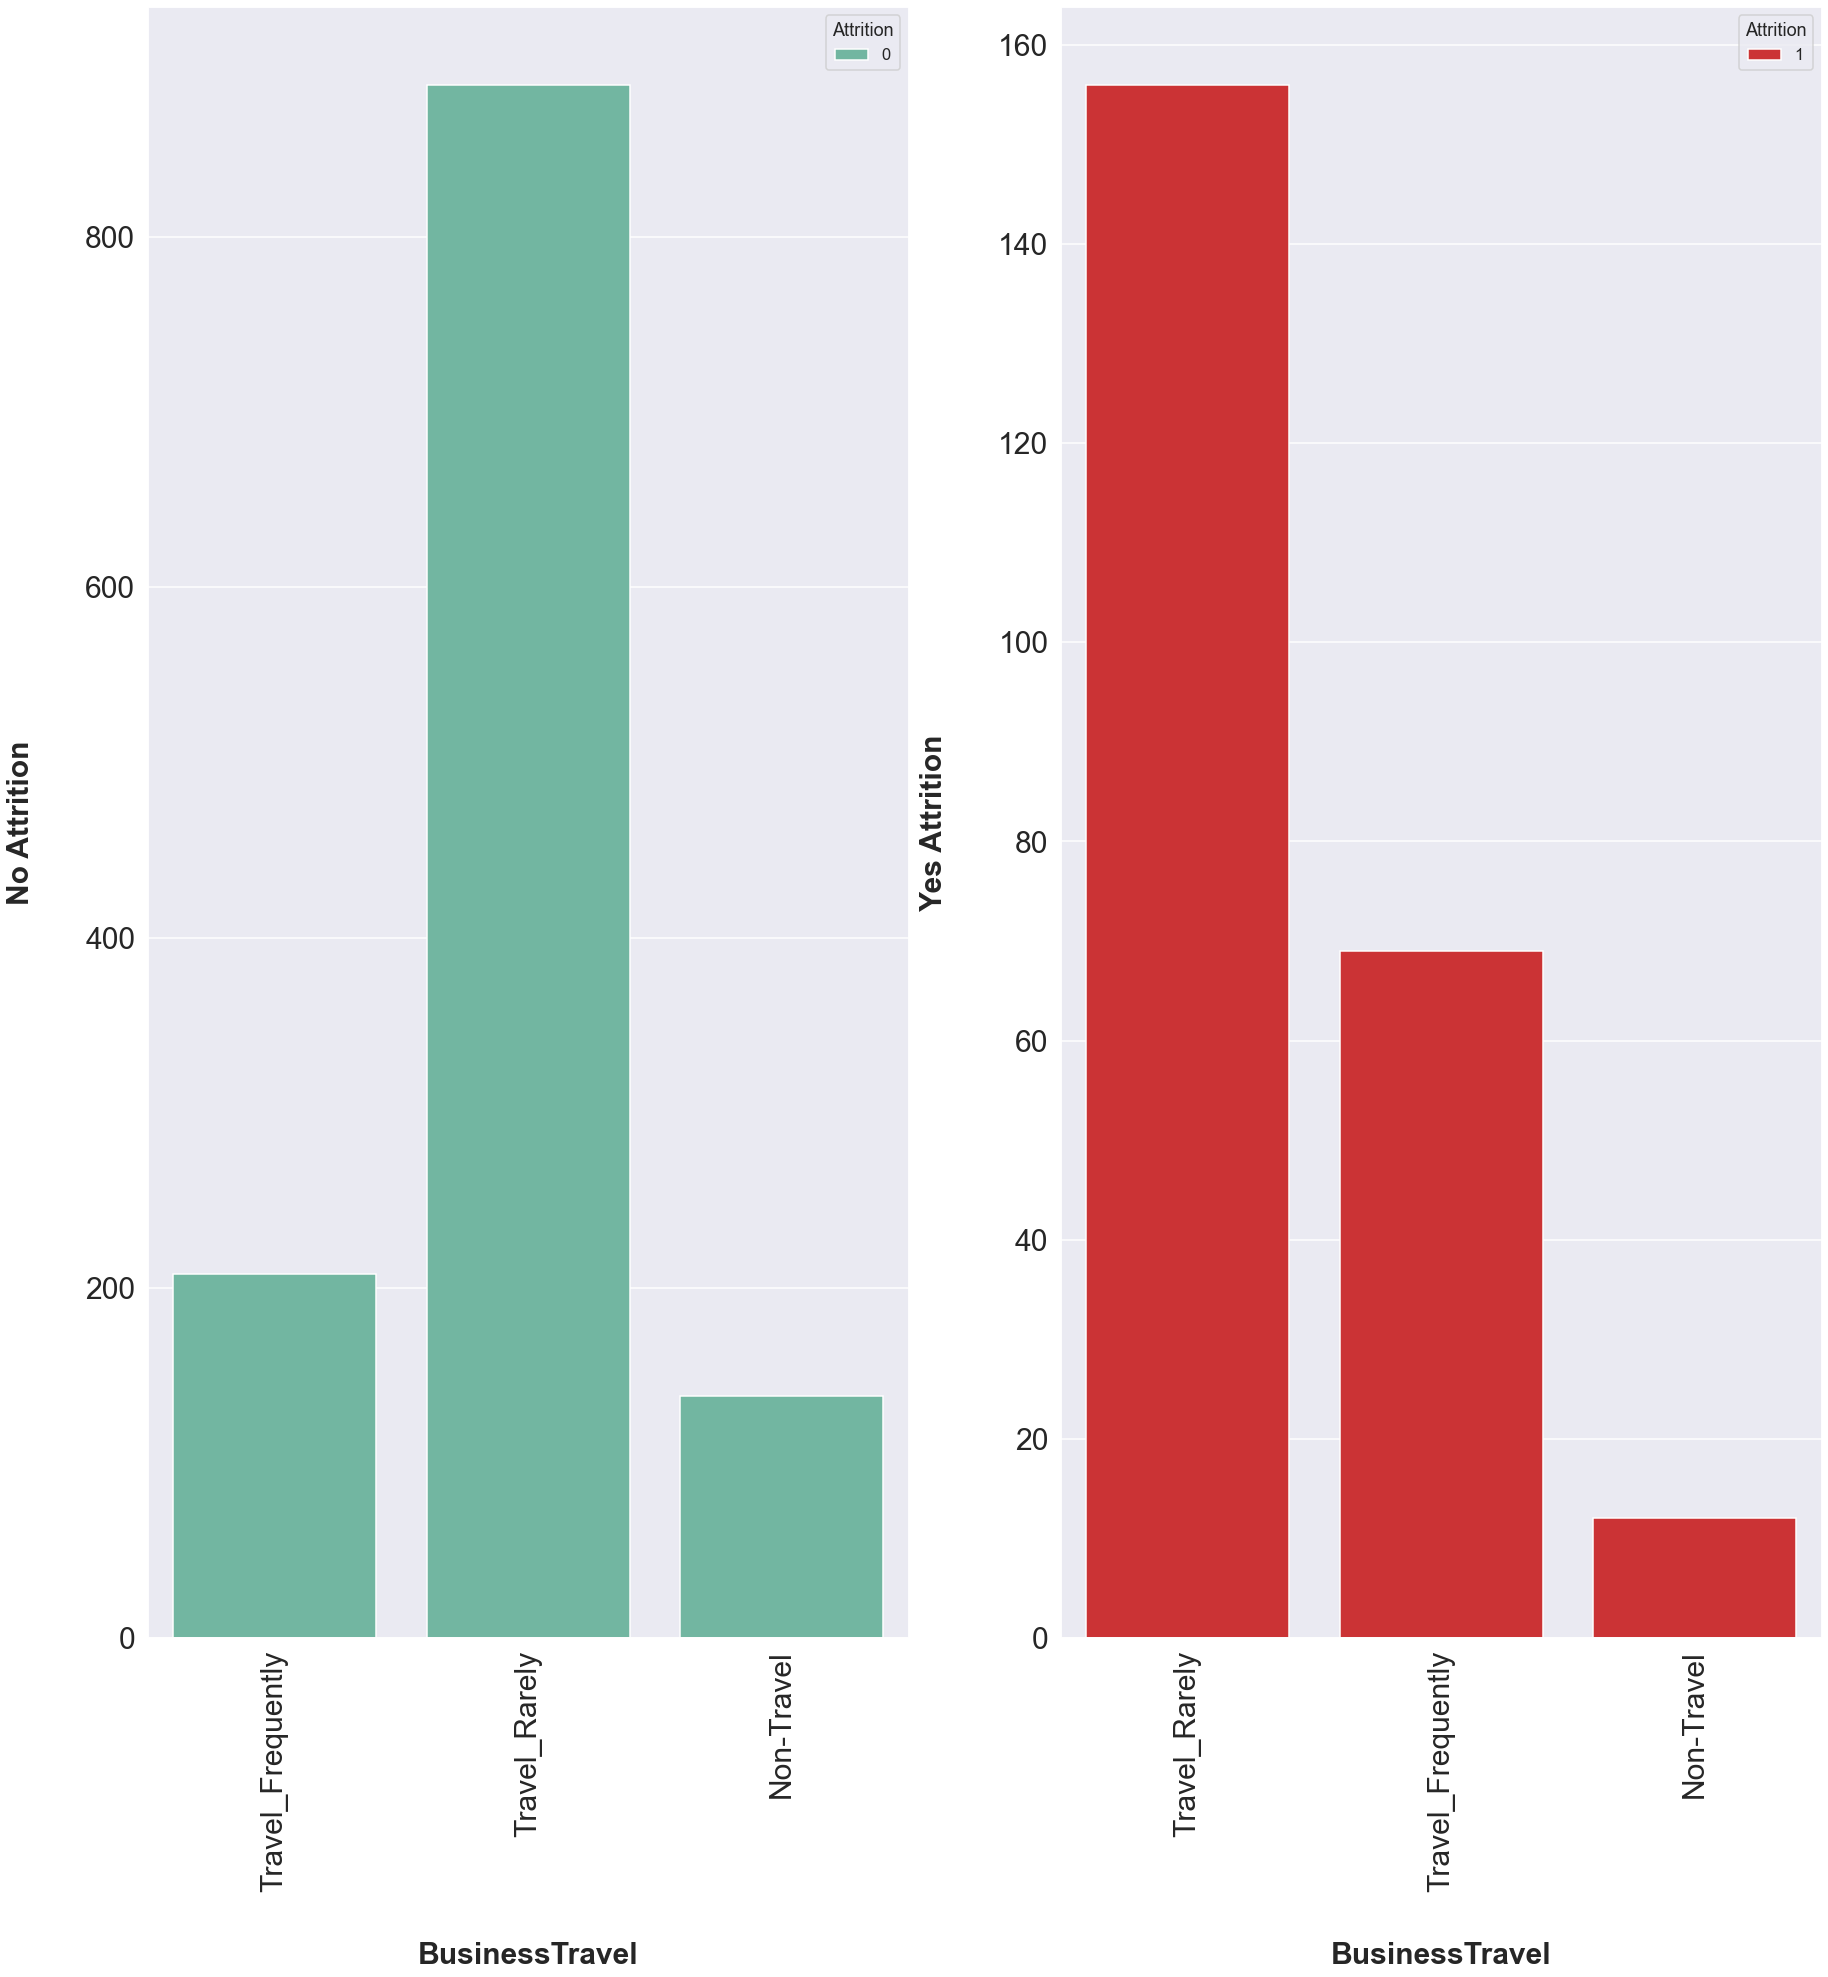

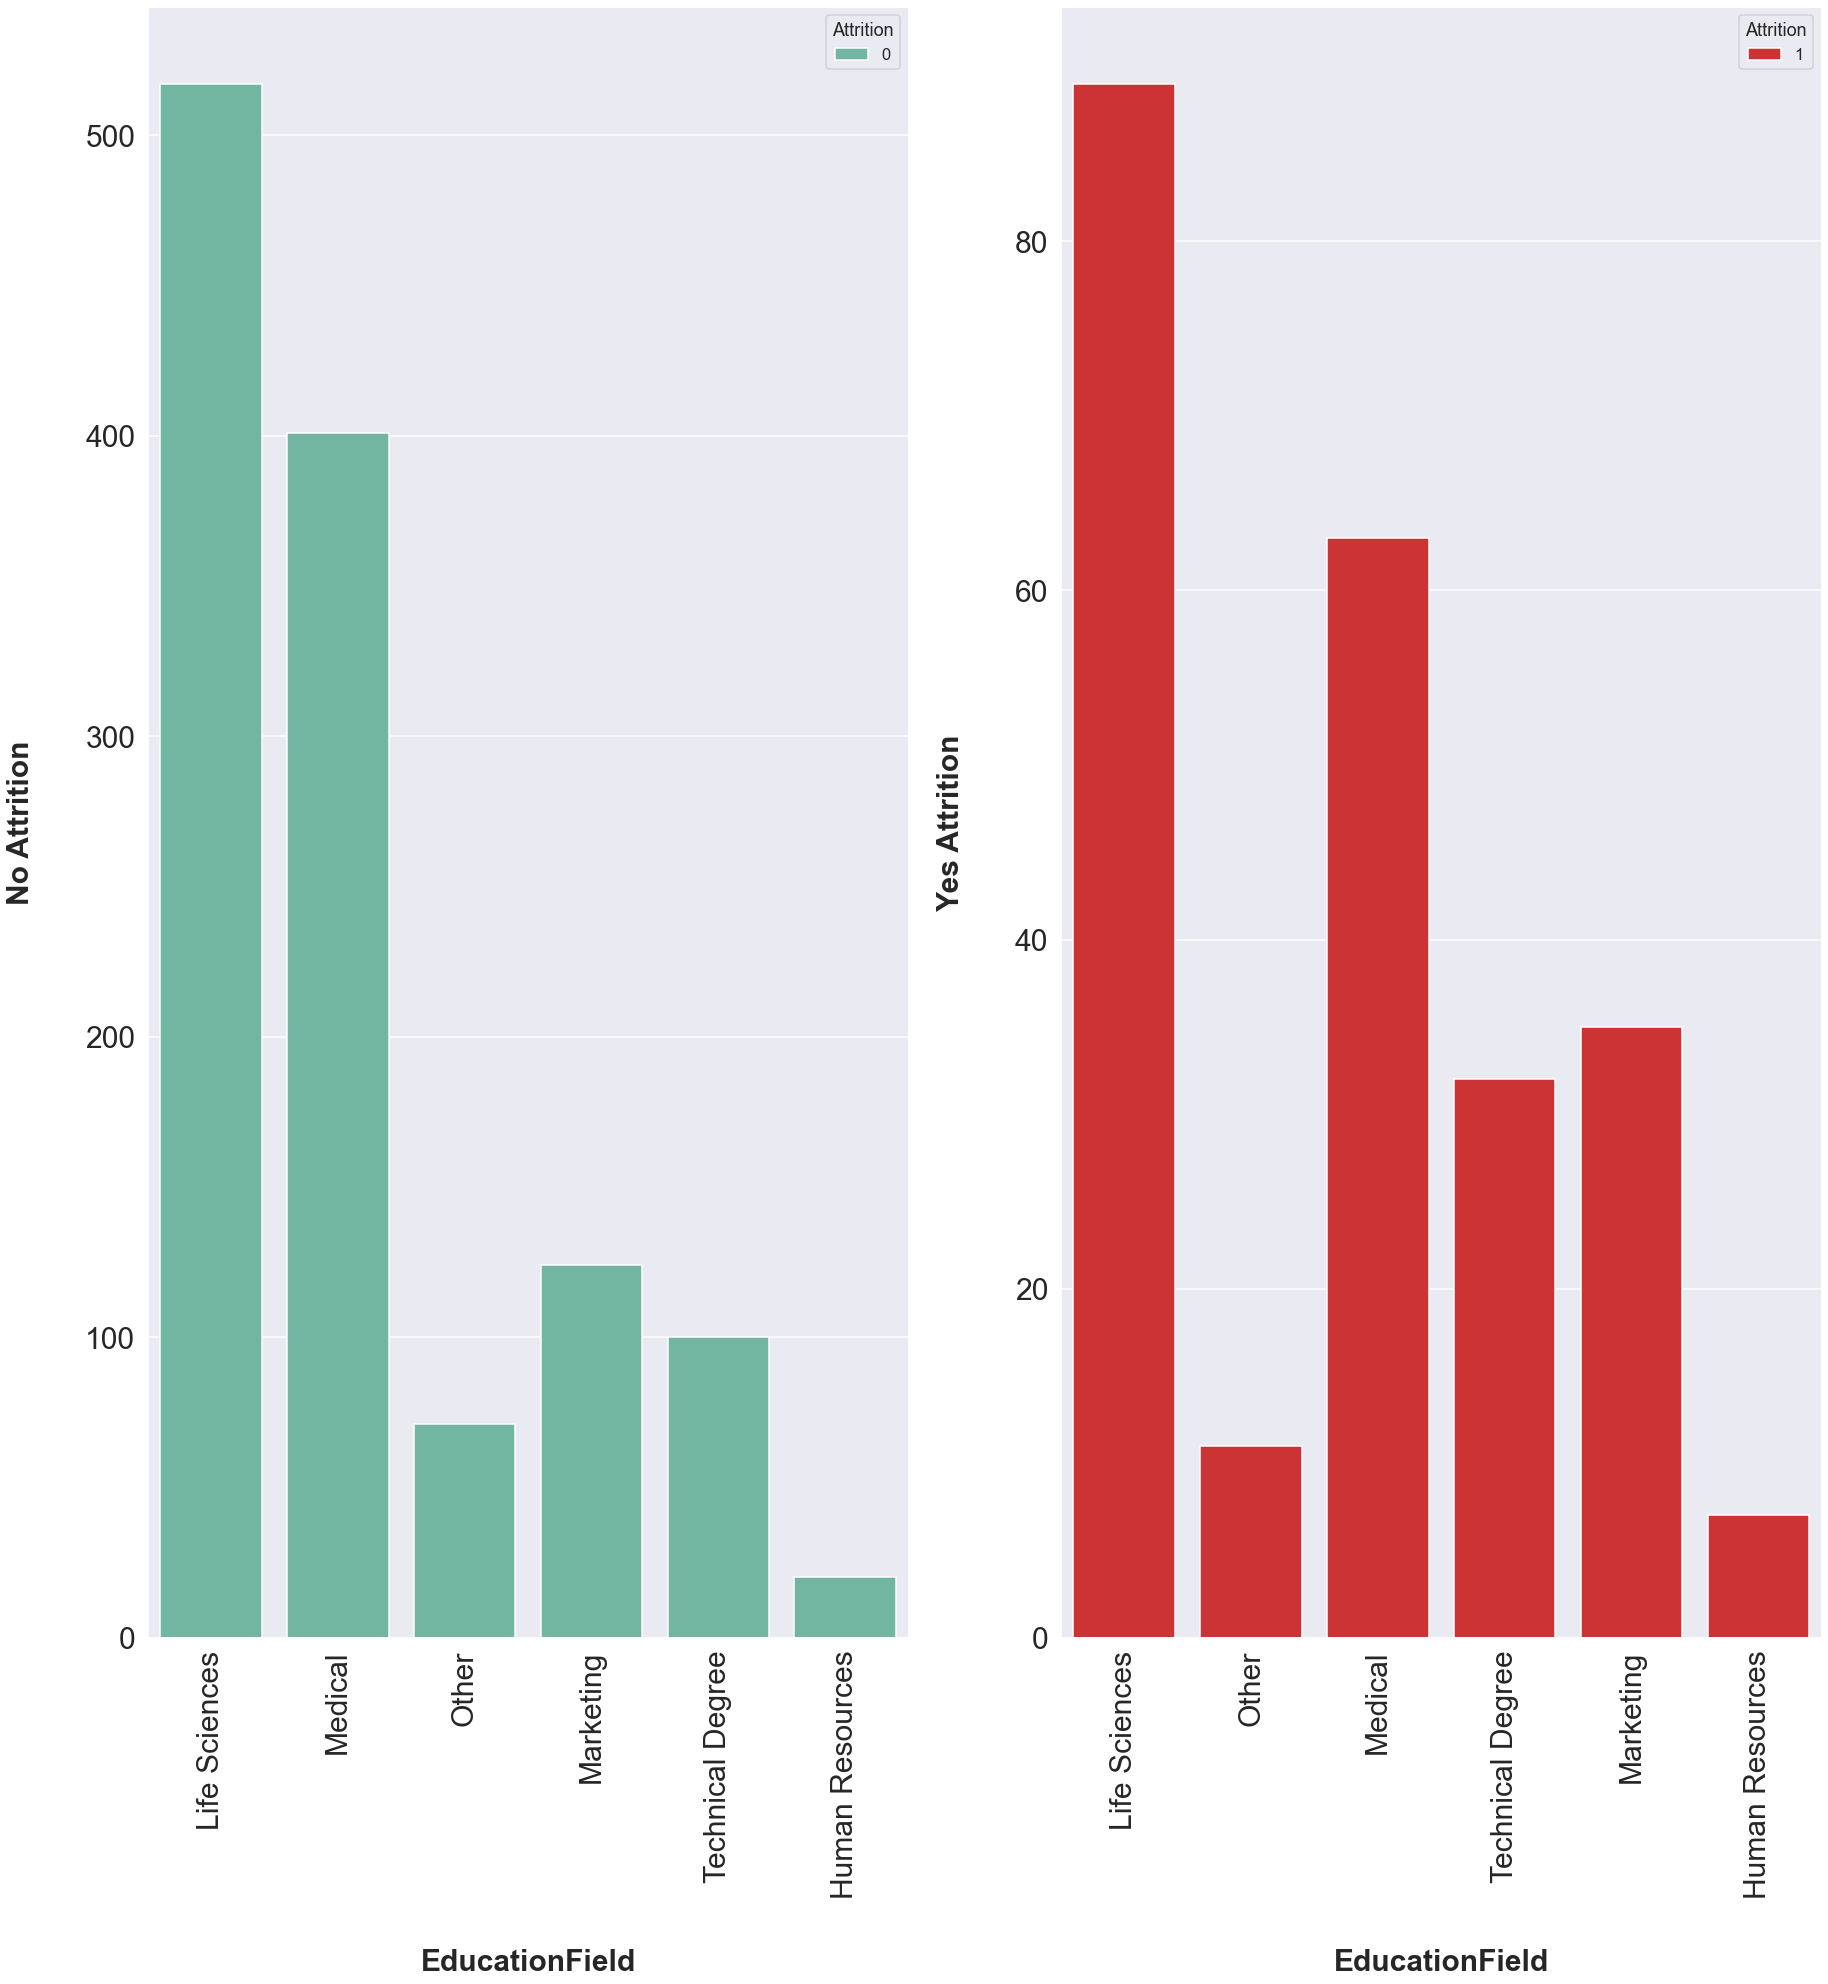

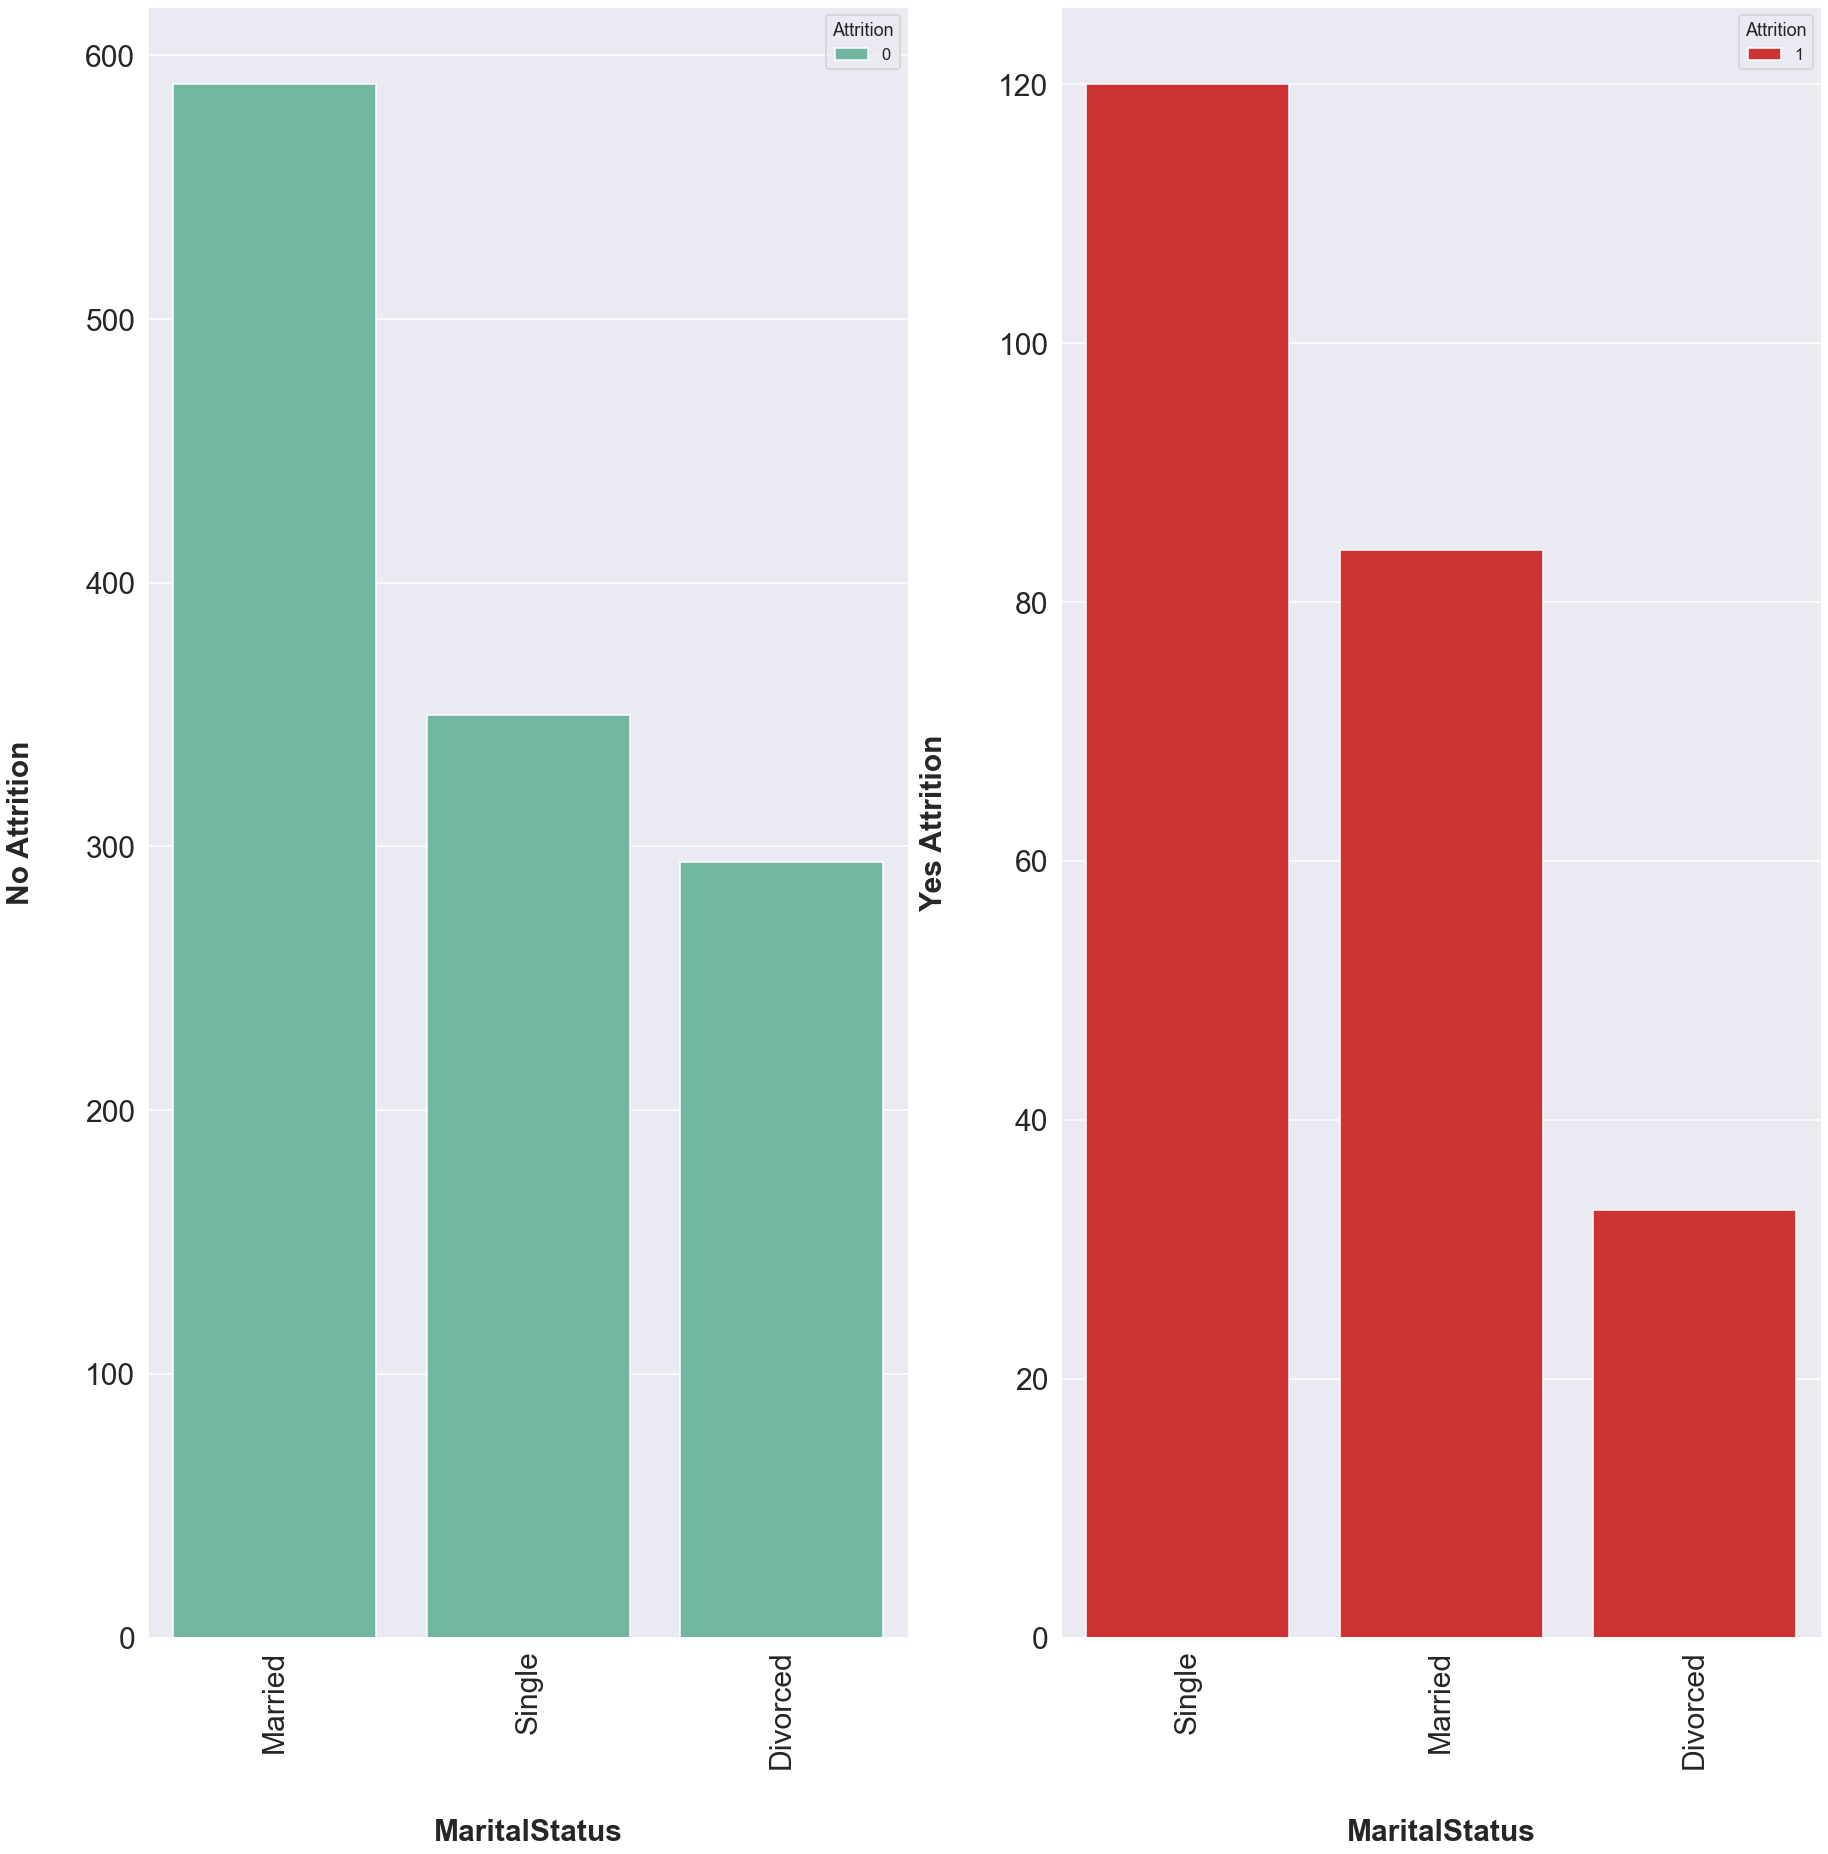

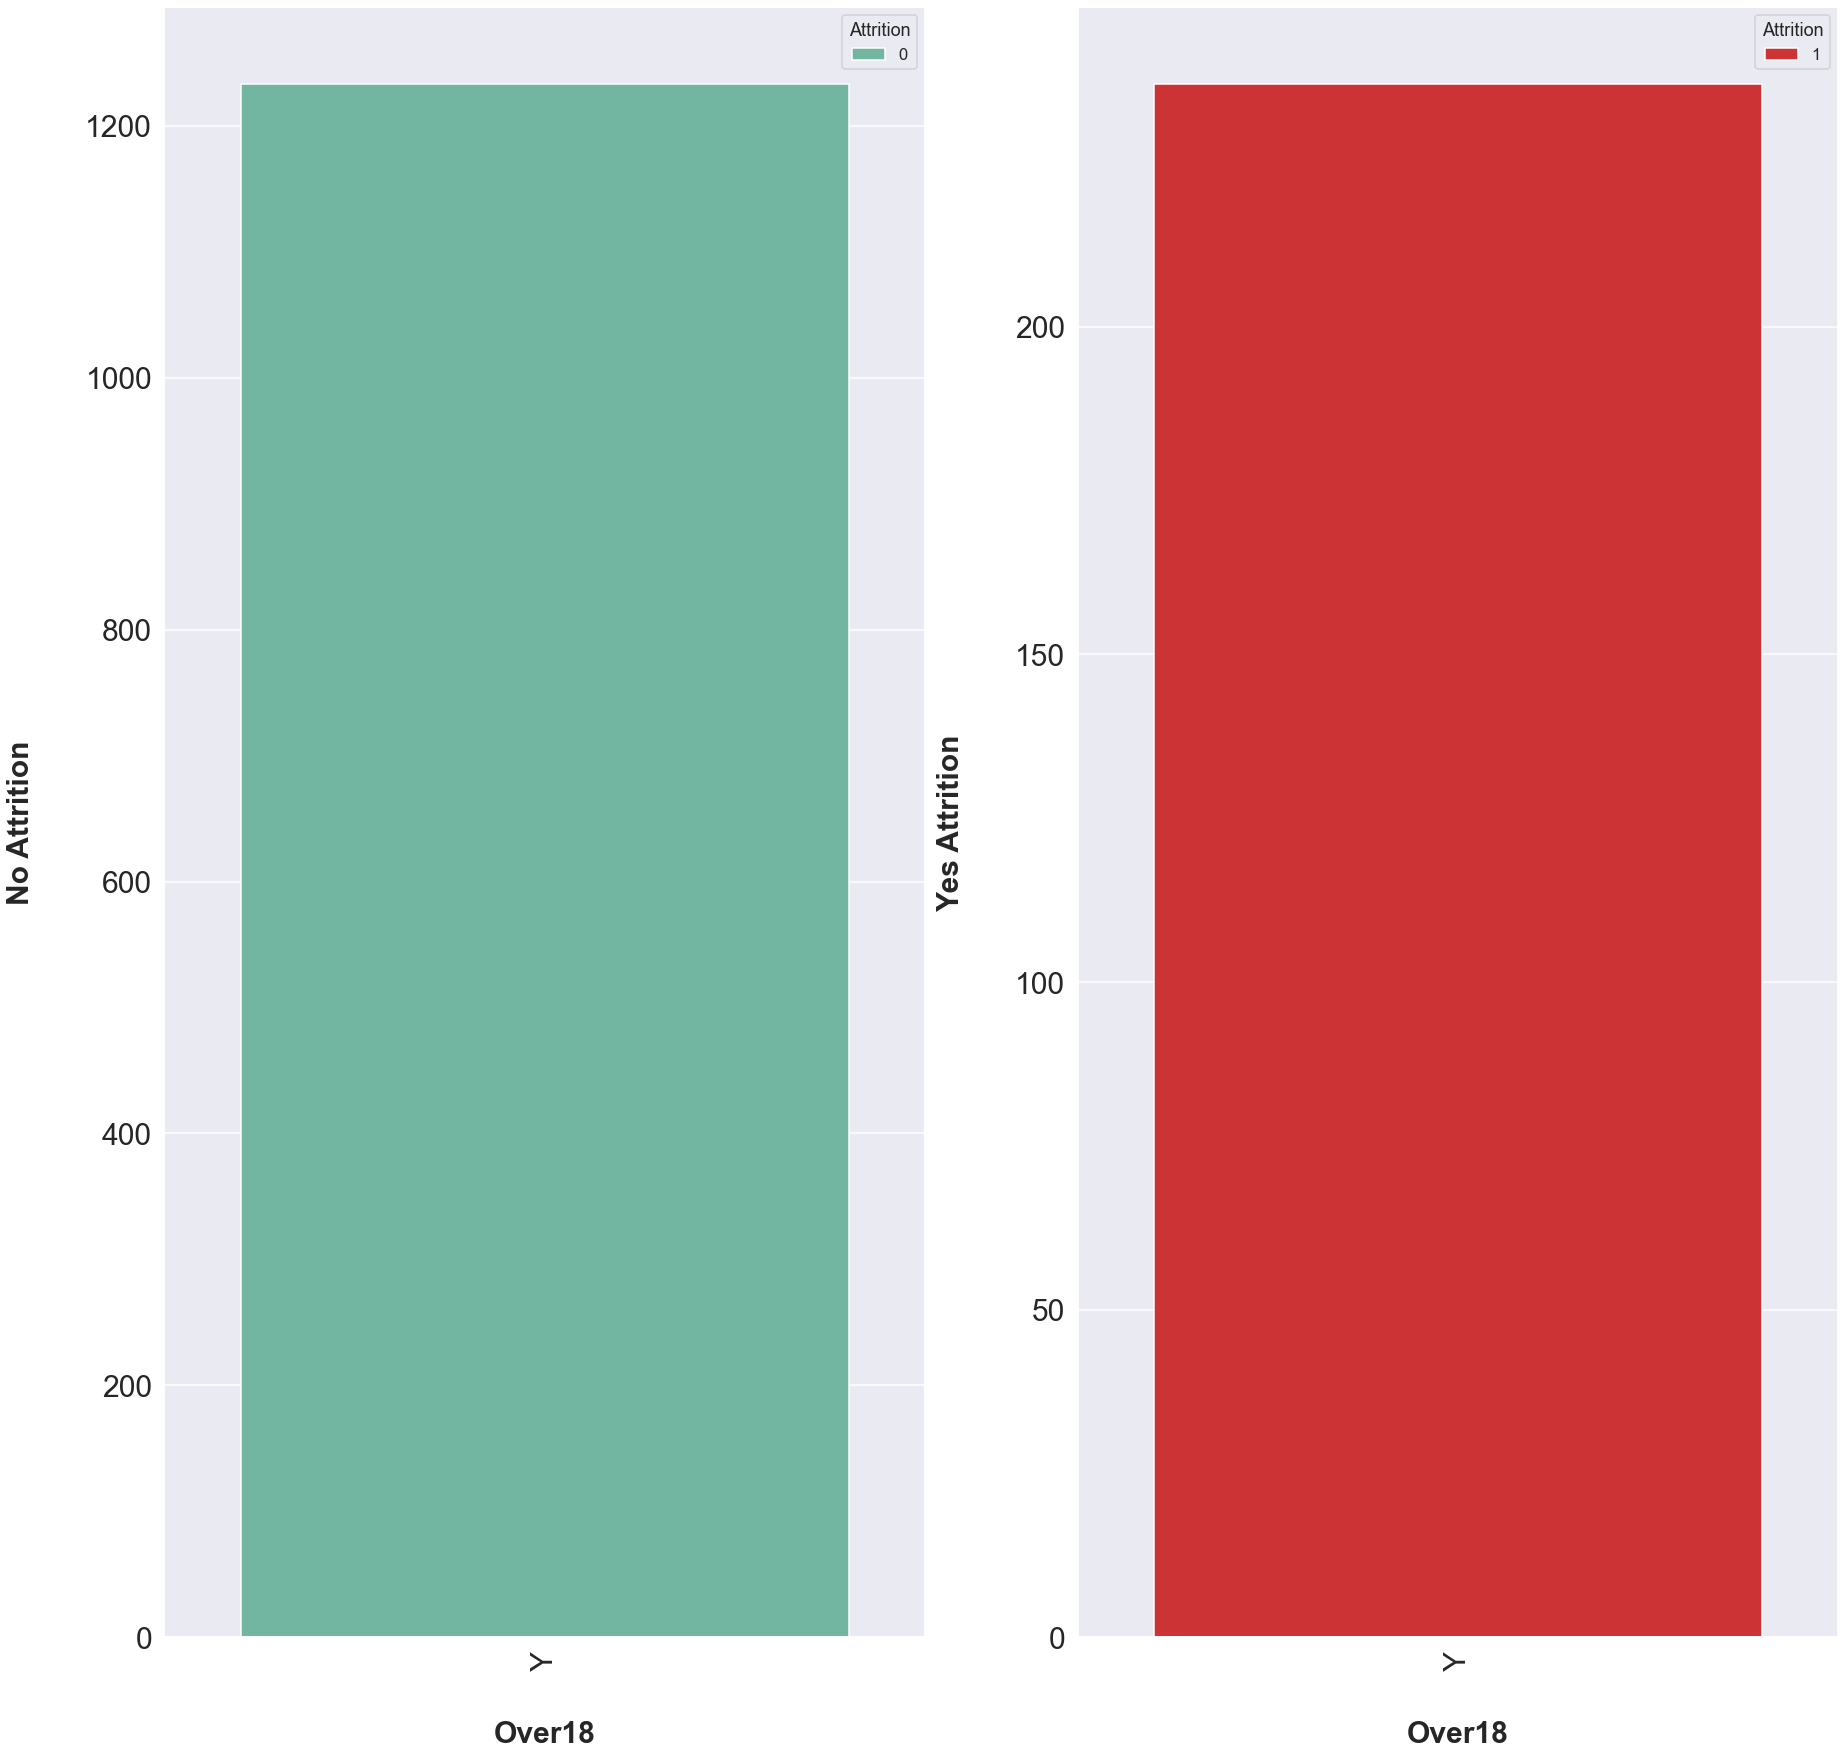

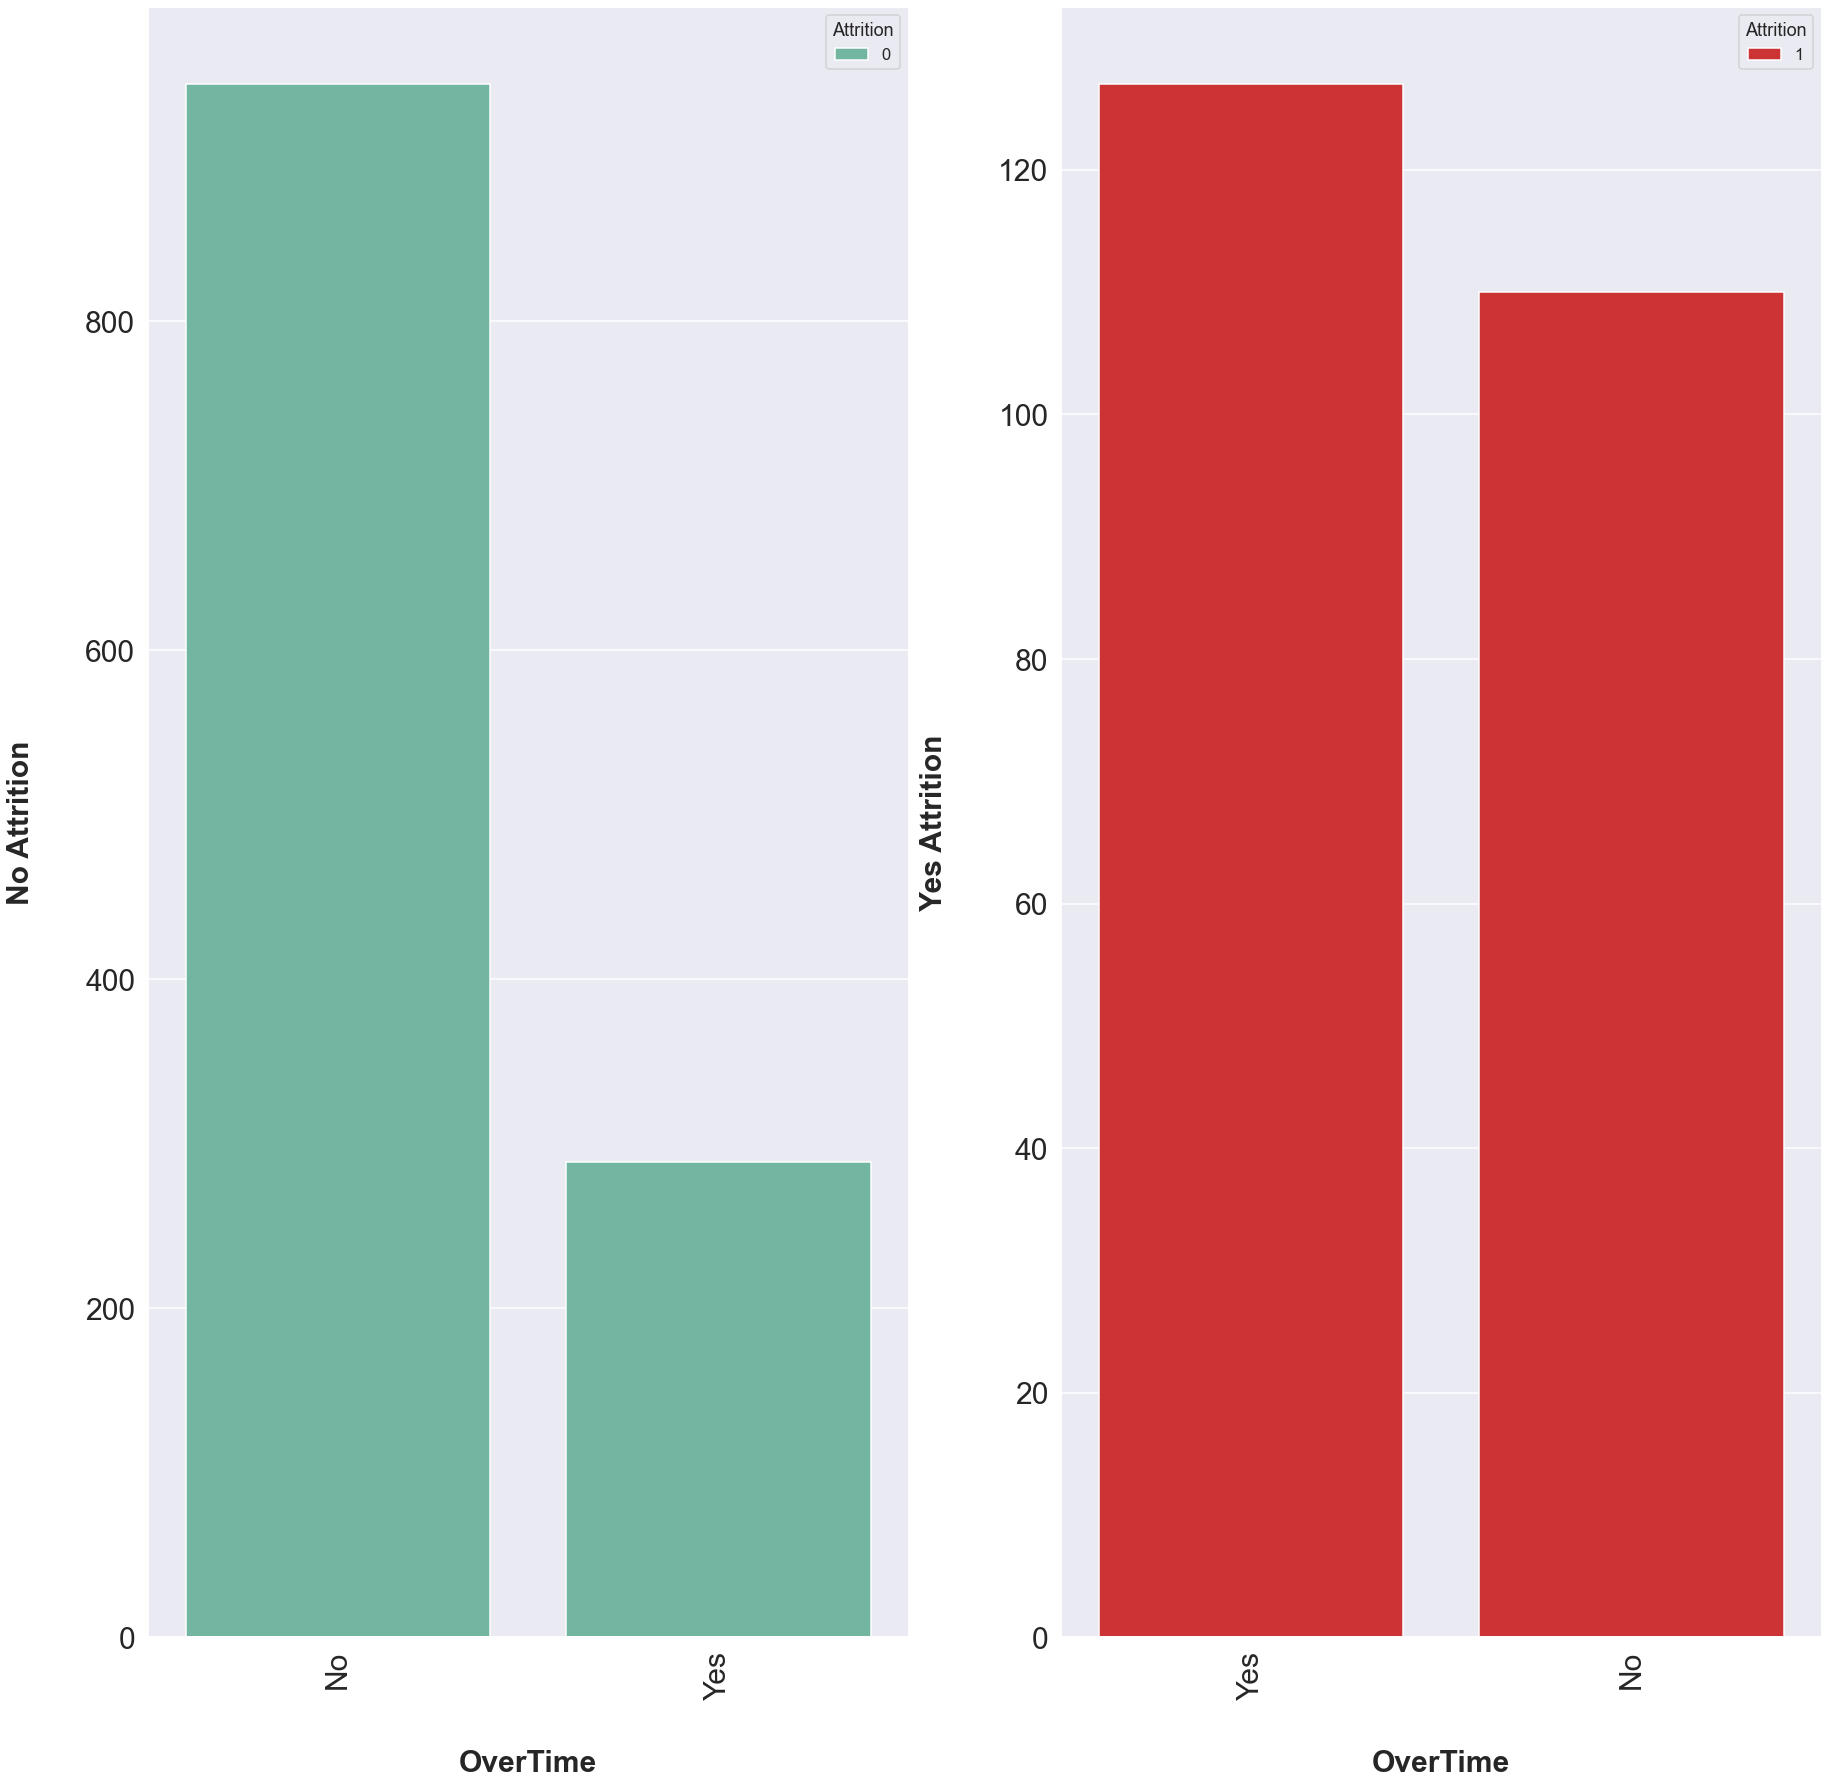

In [34]:
for col in categorical_cols:
    categorical_plot(col)

In [35]:
def uni(var):
    sn.set_style(style='darkgrid')
    plt.figure(figsize=(40,20))
    
    plt.subplot(121)
    sn.distplot(Attrition0[var],color='g')
    plt.yscale('linear')
    plt.xlabel(var,fontsize=30,fontweight='bold')
    plt.ylabel('No Attrition',fontsize=30,fontweight='bold')
    plt.xticks(rotation=90,fontsize=30)
    plt.yticks(rotation=360,fontsize=30)
    
    plt.subplot(122)
    sn.distplot(Attrition1[var],color='r')
    plt.yscale('linear')
    plt.xlabel(var,fontsize=30,fontweight='bold')
    plt.ylabel('Yes Attrition',fontsize=30,fontweight='bold')
    plt.xticks(rotation=90,fontsize=30)
    plt.yticks(rotation=360,fontsize=30)
    
    plt.show()

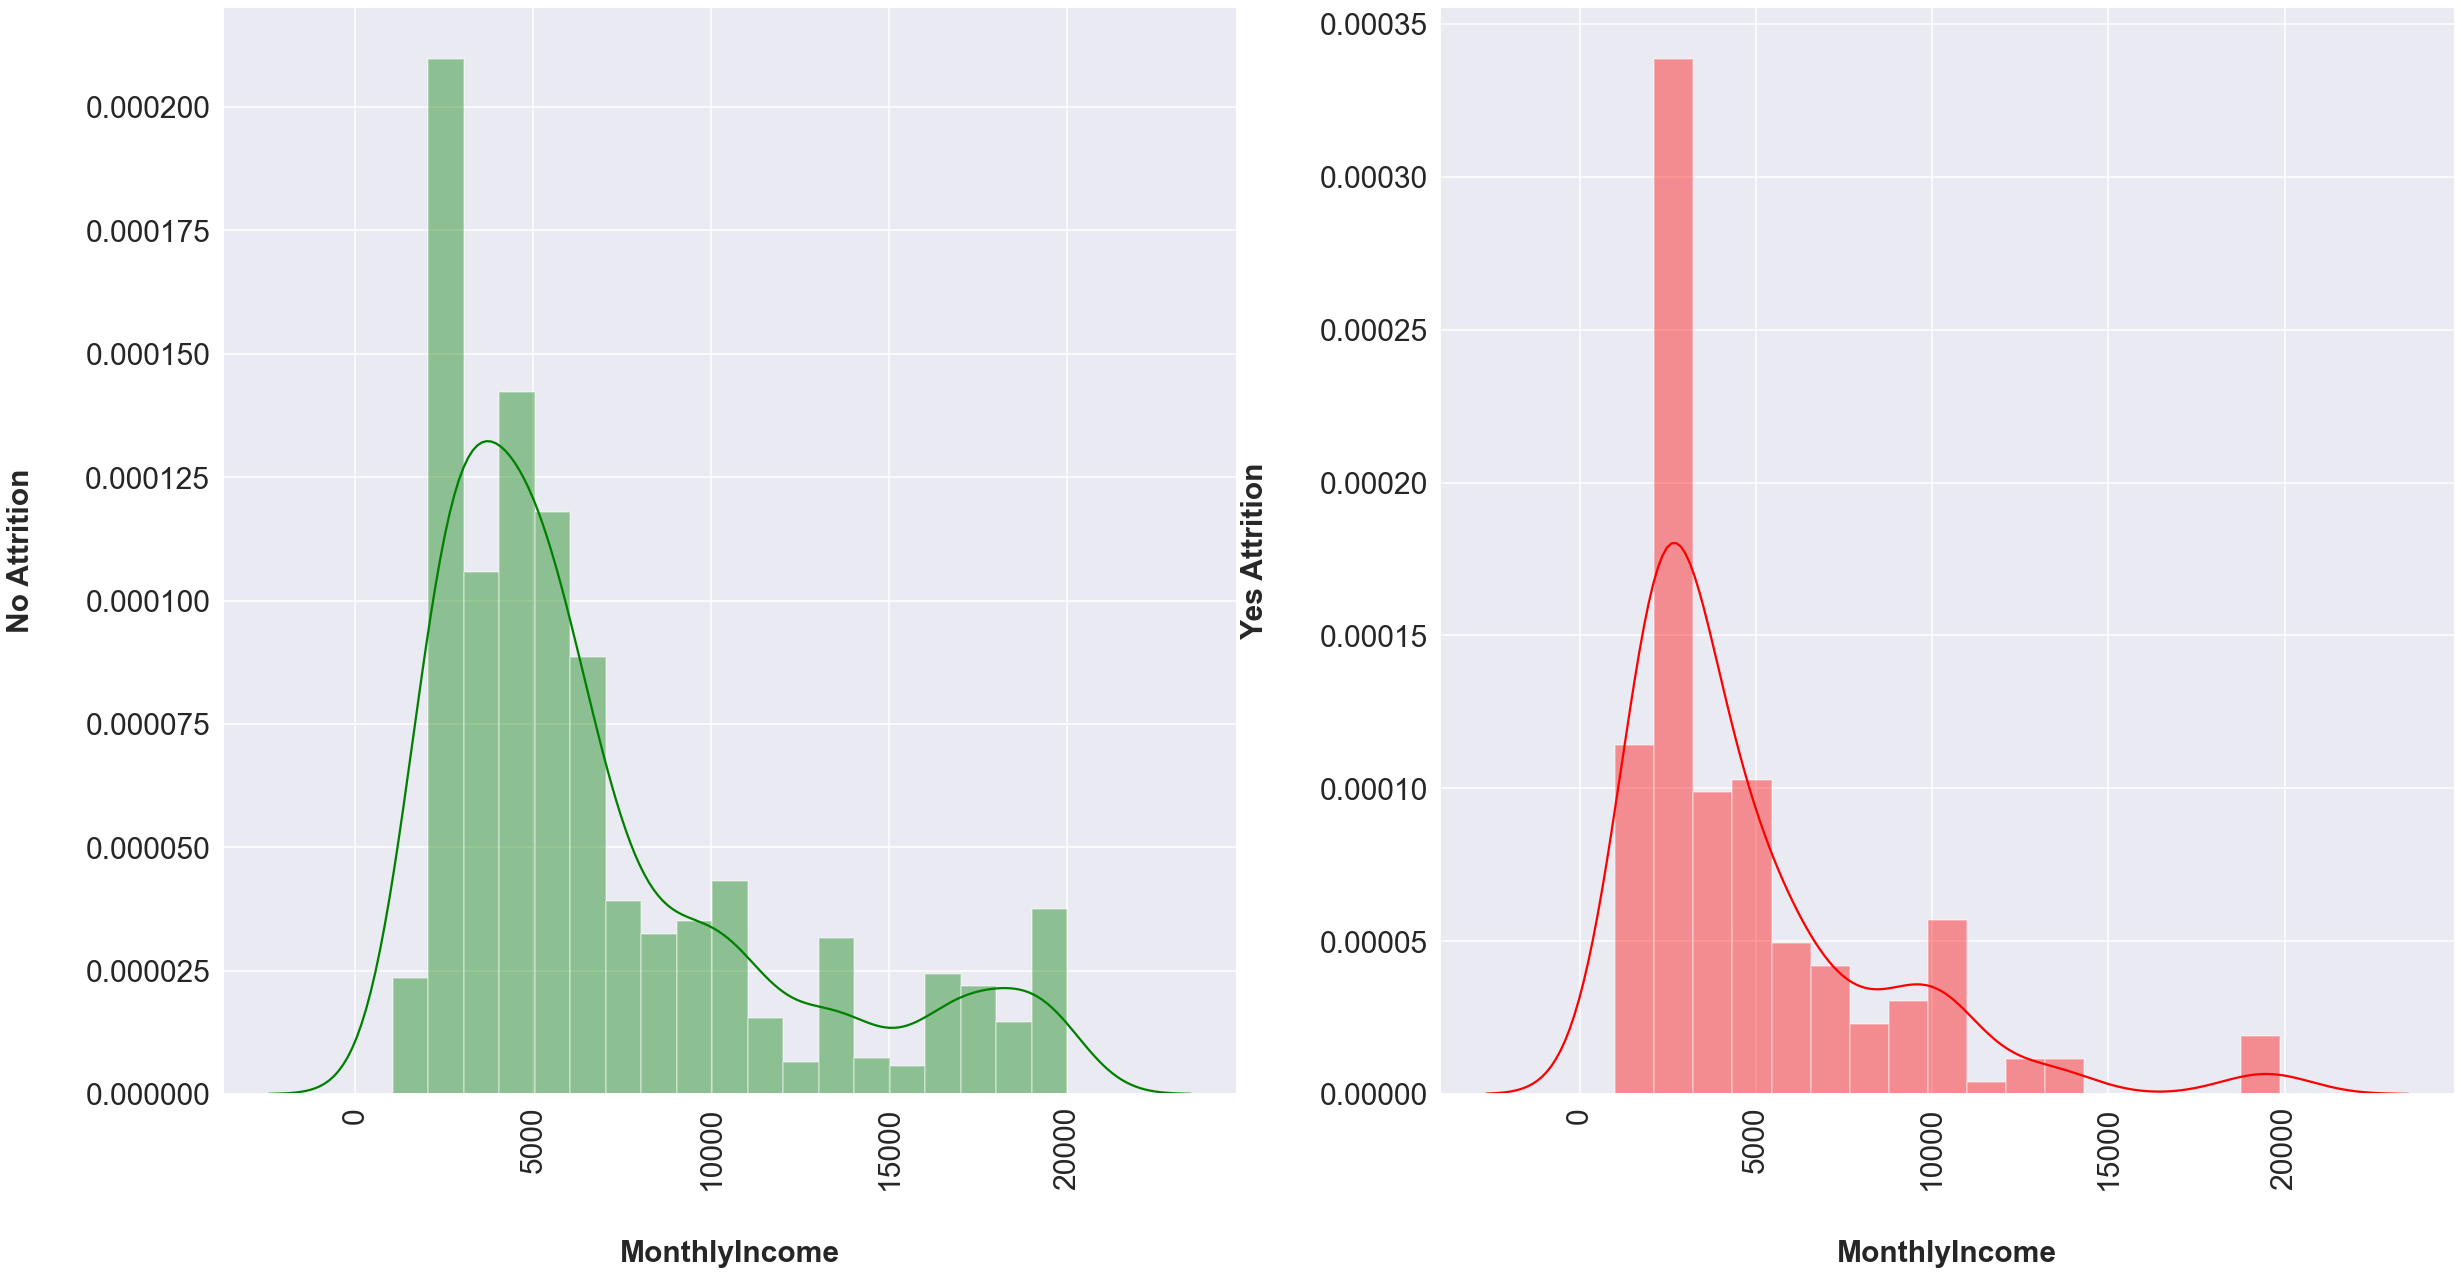

In [36]:
uni('MonthlyIncome')

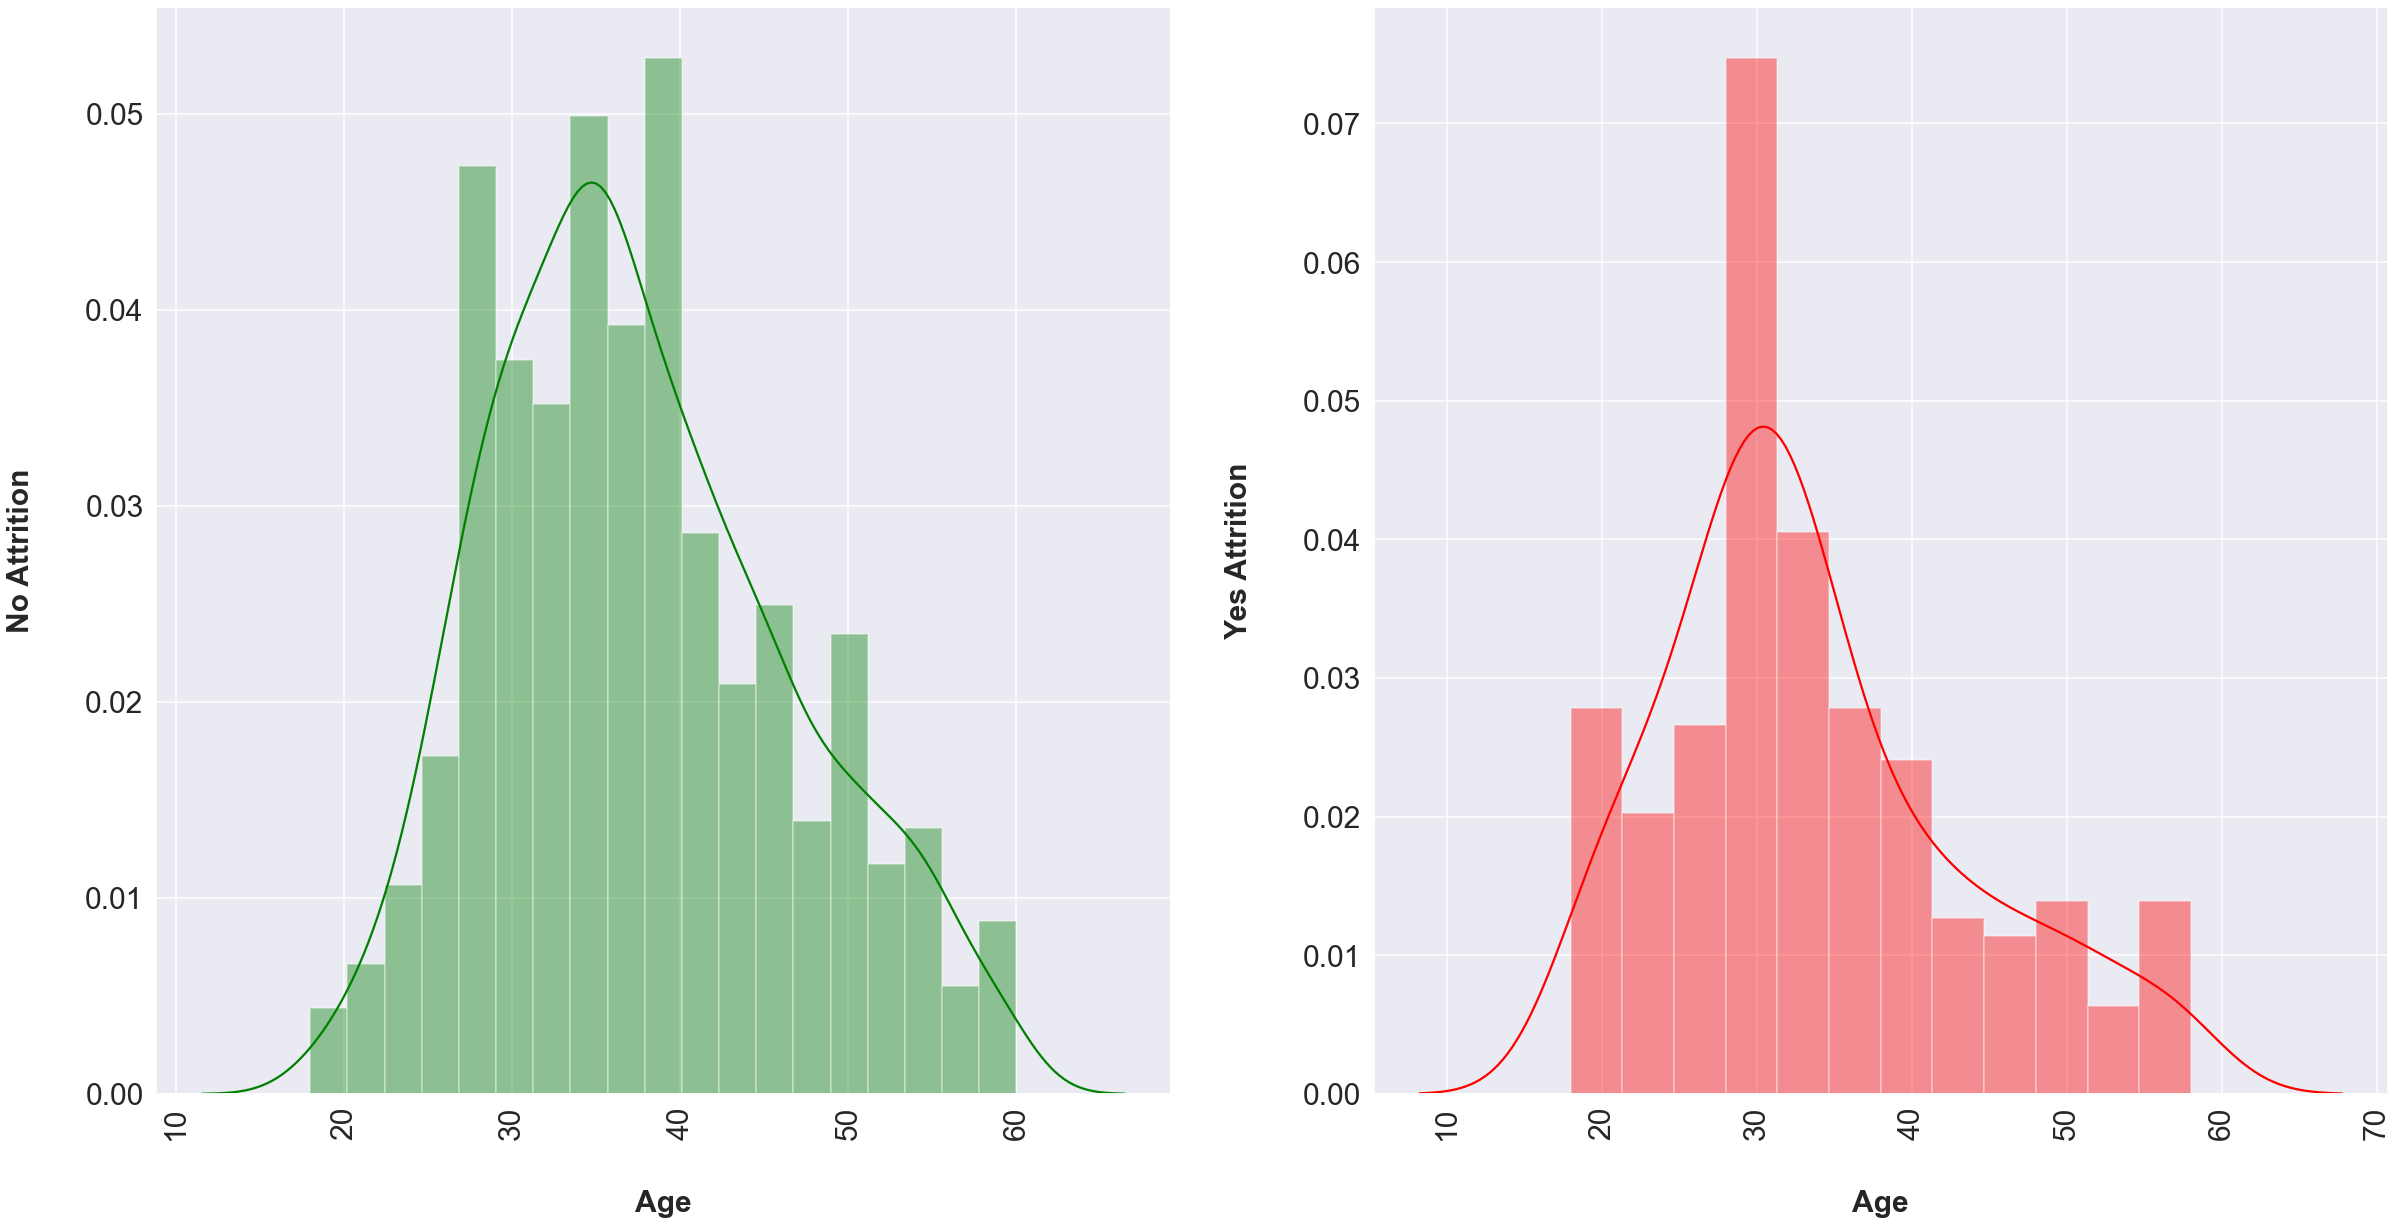

In [37]:
uni('Age')

In [38]:
from scipy.stats import skew,kurtosis
def uva_numeric(data,var_group):
    size=len(var_group)
    plt.figure(figsize=(7*size,3),dpi=100)
    
    for j,i in enumerate(var_group):
        mini=data[i].min()
        maxi=data[i].max()
        rang=maxi-mini
        mean=np.mean(data[i])
        median=np.median(data[i])
        std_dev=np.std(data[i])
        skew=data[i].skew()
        kurtosis=data[i].kurtosis()
        
        point=mean-std_dev, mean+std_dev
        
        plt.subplot(1,size,j+1)
        sn.kdeplot(data[i],shade=True,color='LightGreen')
        sn.lineplot(point,[0,0],color='black',label='Std_dev')
        sn.scatterplot([mini,maxi],[0,0],color='red',label='min/max')
        sn.scatterplot(mean,[0],color='orange',label='mean')
        sn.scatterplot(median,[0],color='blue',label='median')
        plt.xlabel('{}'.format(i),fontsize=20)
        plt.ylabel('Density')
        plt.title('std_dev={};kurtosis={};\nskew={};range={};\nmean={};median={}'.format((round(point[0],2),
                                                                                          round(point[1],2)),   
                                                                                          round(kurtosis,2),
                                                                                          round(skew,2),
                                                                                          (round(mini,2),
                                                                                           round(maxi,2)),
                                                                                           round(mean,2),
                                                                                           round(median,2)))

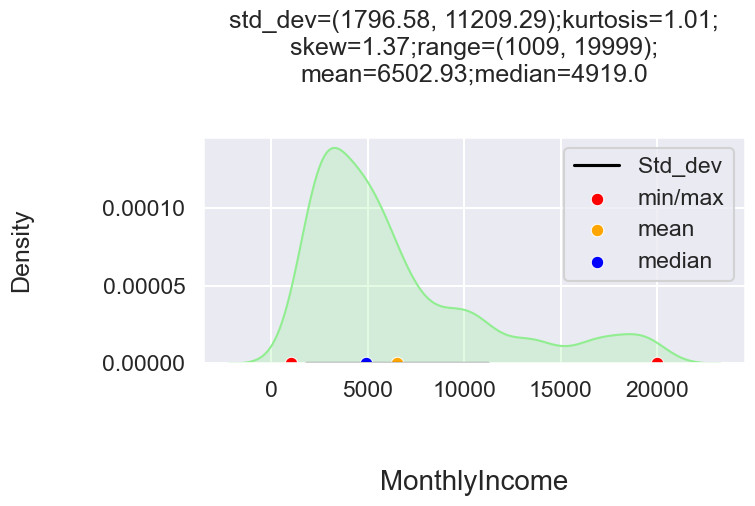

In [39]:
uva_numeric(df,['MonthlyIncome'])

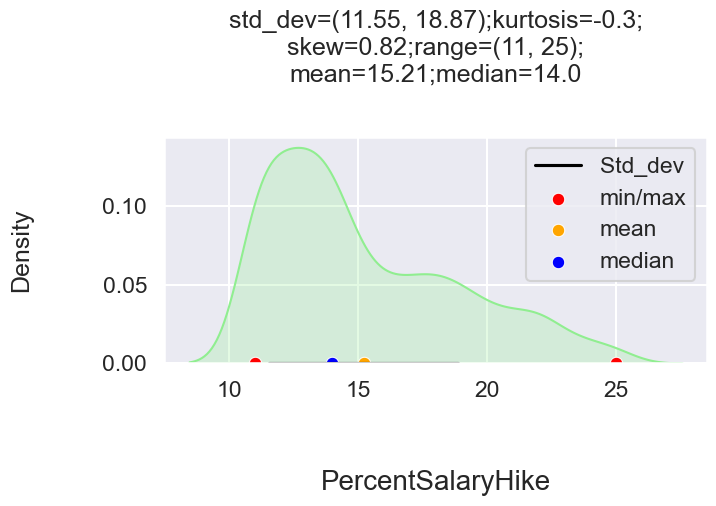

In [40]:
uva_numeric(df,['PercentSalaryHike'])

In [42]:
numerical_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [43]:
categorical_cols

['BusinessTravel', 'EducationField', 'MaritalStatus', 'Over18', 'OverTime']

In [44]:
def biplot(df,feature,title):
    temp=df[feature].value_counts()
    
    perc=df[[feature,'Attrition']].groupby([feature],as_index=False).mean()
    perc.sort_values(by='Attrition',ascending=False,inplace=True)
    fig=make_subplots(rows=1,cols=2,
                            subplot_titles=("Count of "+title,"% of Yes Attrition within each category"))
    fig.add_trace(go.Bar(x=temp.index,y=temp.values),row=1,col=1)
    fig.add_trace(go.Bar(x=perc[feature].to_list(),y=perc['Attrition'].to_list()),row=1,col=2)
    fig['layout']['xaxis']['title']=feature
    fig['layout']['xaxis2']['title']=feature
    fig['layout']['yaxis']['title']='Count'
    fig['layout']['yaxis2']['title']='% of Yes Attrition'
    fig.update_layout(height=600,width=1000,title_text=title,showlegend=False)
    fig.show()

In [45]:
biplot(df,'Age_Group','Monthlyincome')

In [46]:
biplot(df,'MaritalStatus','MonthlyIncome')

In [47]:
def biplot(df,feature,title):
    temp=df[feature].value_counts()
    
    perc=df[[feature,'Attrition']].groupby([feature],as_index=False).mean()
    perc.sort_values(by='Attrition',ascending=False,inplace=True)
    fig=make_subplots(rows=1,cols=2,
                            subplot_titles=("count of"+title,"% of Yes Attrition within each category"))
    fig.add_trace(go.Bar(x=temp.index,y=temp.values),row=1,col=1)
    fig.add_trace(go.Bar(x=perc['Attrition'].to_list(),y=perc['Attrition'].to_list()),row=1,col=2)
    fig['layout']['xaxis']['title']=feature
    fig['layout']['xaxis2']['title']=feature
    fig['layout']['yaxis']['title']='Count'
    fig['layout']['yaxis2']['title']='% of Yes Attrition'
    fig.update_layout(height=600,width=1000,title_text=title,showlegend=False)
    fig.show()

In [48]:
biplot(df,'Age_Group','Monthlyincome')

In [49]:
df[['Attrition','MonthlyIncome','EducationField','MaritalStatus']].head(10)

Attrition  MonthlyIncome EducationField MaritalStatus
0          1           5993  Life Sciences        Single
1          0           5130  Life Sciences       Married
2          1           2090          Other        Single
3          0           2909  Life Sciences       Married
4          0           3468        Medical       Married
5          0           3068  Life Sciences        Single
6          0           2670        Medical       Married
7          0           2693  Life Sciences      Divorced
8          0           9526  Life Sciences        Single
9          0           5237        Medical       Married

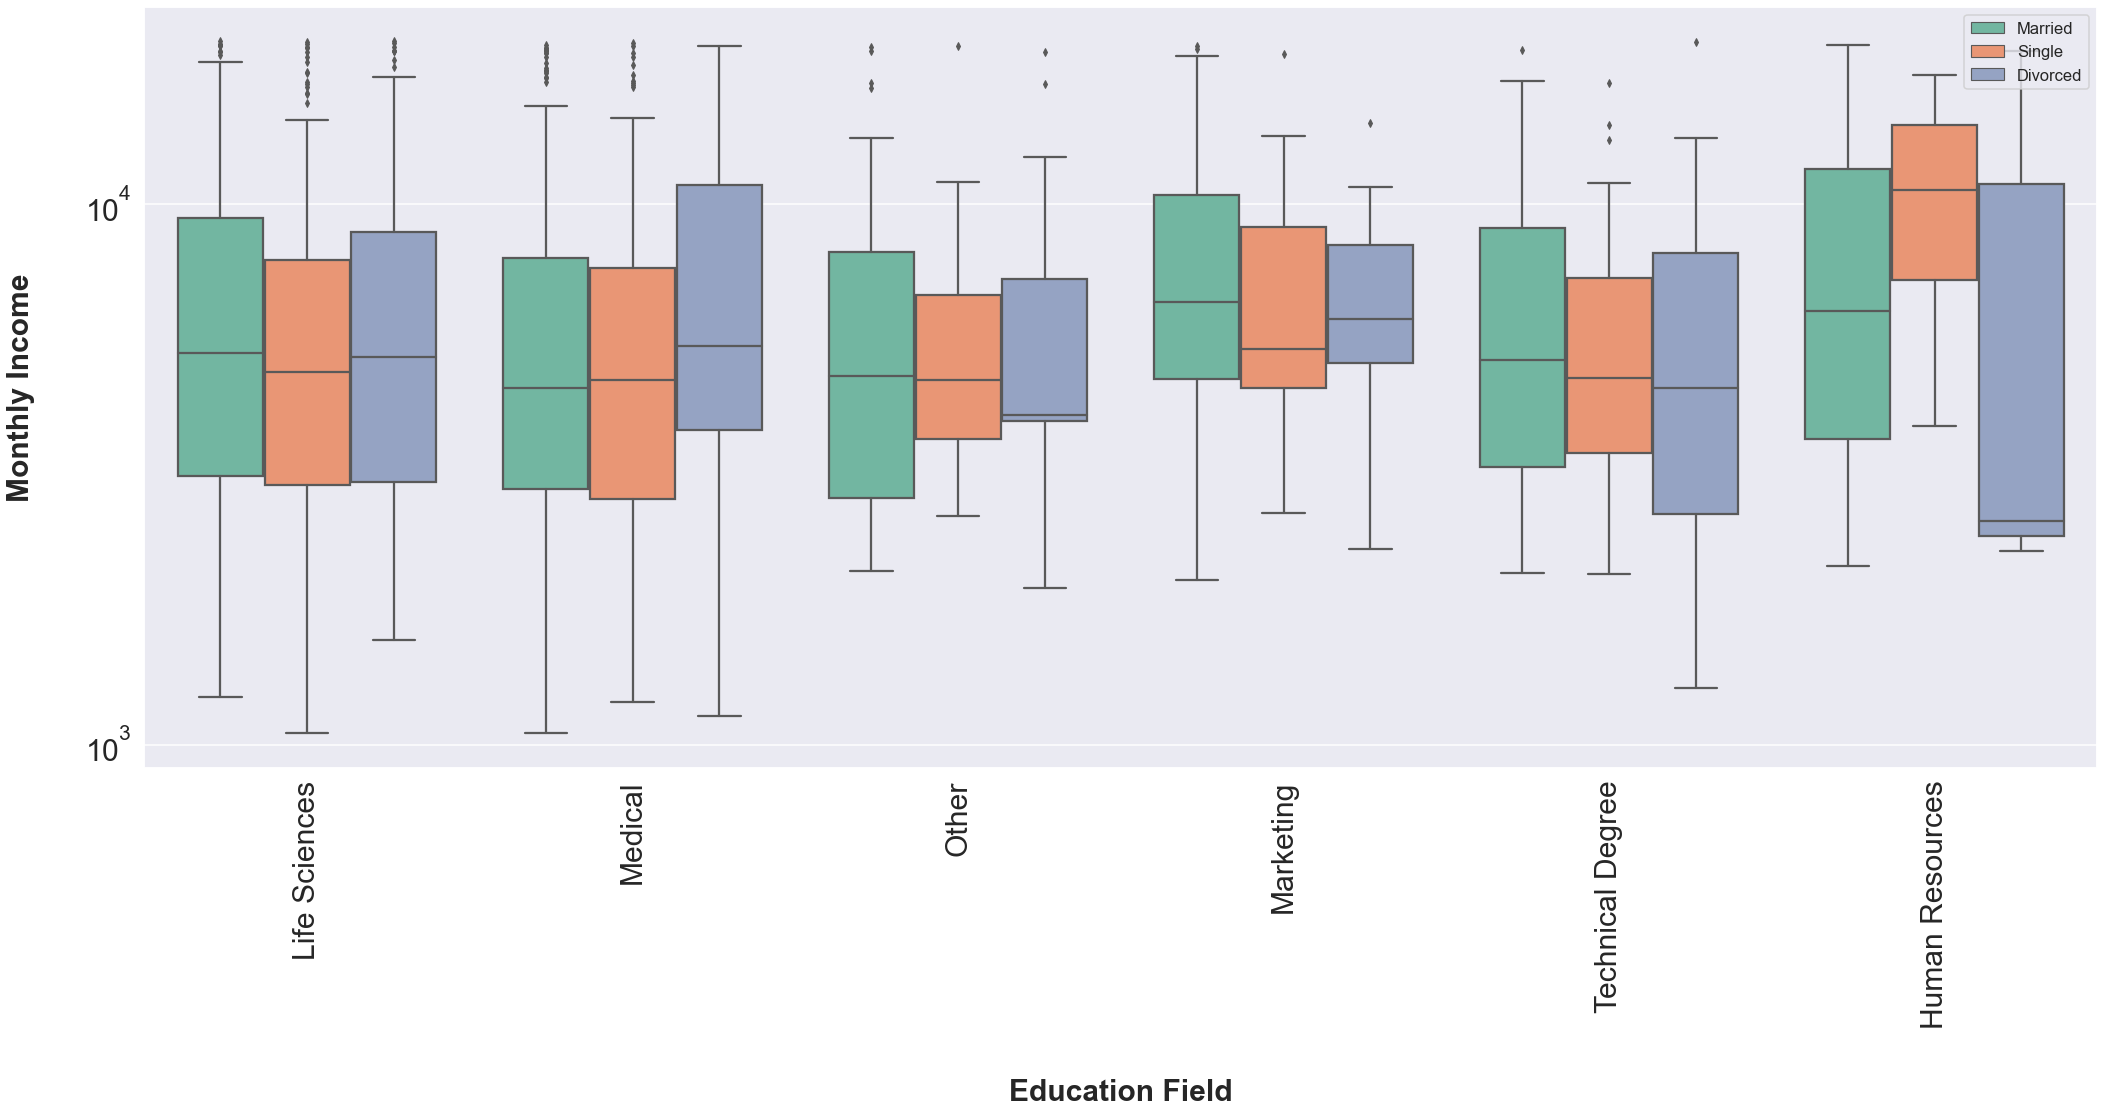

In [50]:
plt.figure(figsize=(35,14))
plt.yscale('log')
sn.boxplot(x='EducationField',y='MonthlyIncome',data=Attrition0,palette='Set2',hue='MaritalStatus',orient='v')
plt.legend(loc='upper right')
plt.xlabel('Education Field',fontsize=30,fontweight='bold')
plt.ylabel('Monthly Income',fontsize=30,fontweight='bold')
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=360,fontsize=30)
plt.show()

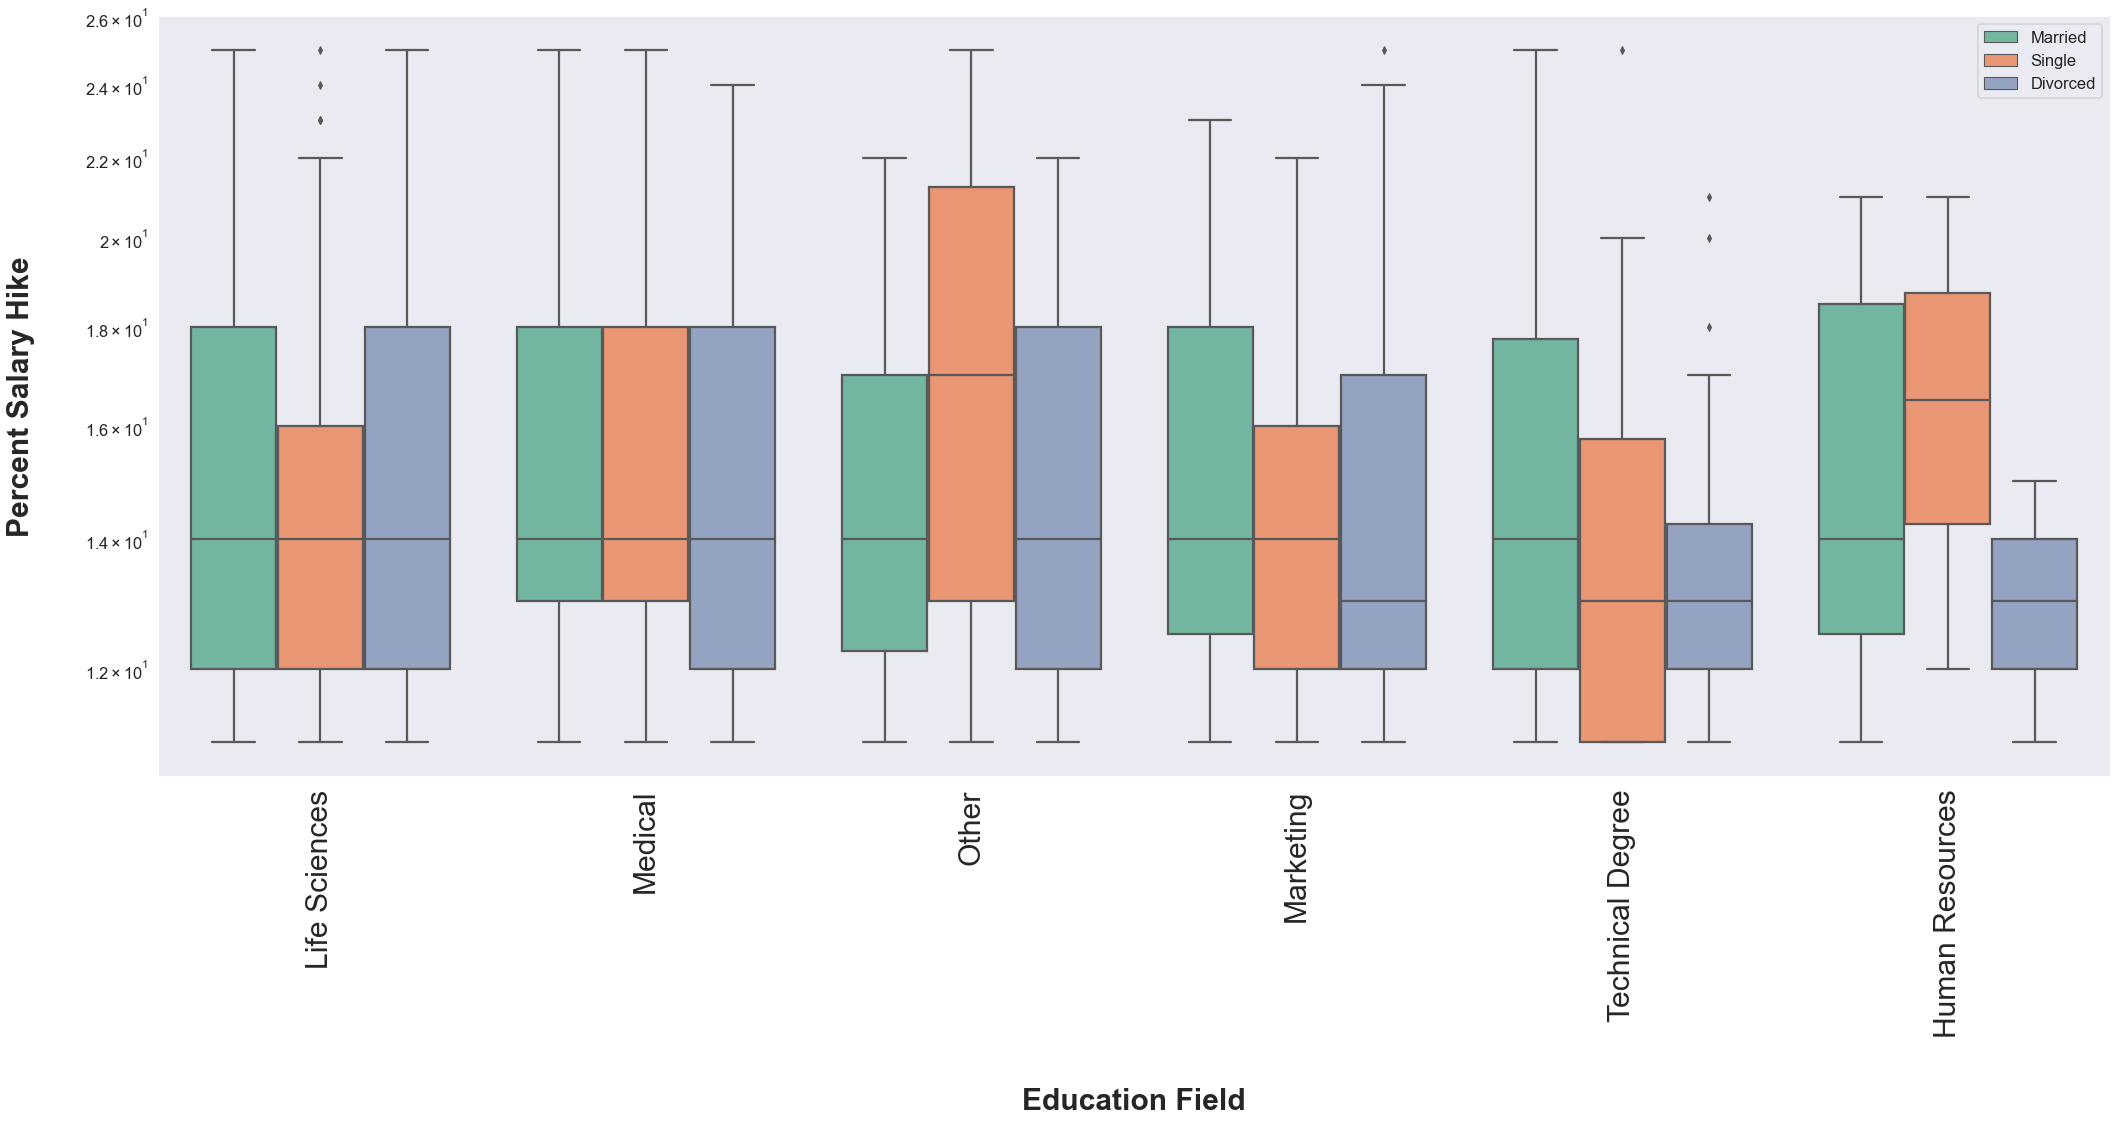

In [51]:
plt.figure(figsize=(35,14))
plt.yscale('log')
sn.boxplot(x='EducationField',y='PercentSalaryHike',data=Attrition0,palette='Set2',hue='MaritalStatus',orient='v')
plt.legend(loc='upper right')
plt.xlabel('Education Field',fontsize=30,fontweight='bold')
plt.ylabel('Percent Salary Hike',fontsize=30,fontweight='bold')
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=360,fontsize=30)
plt.show()

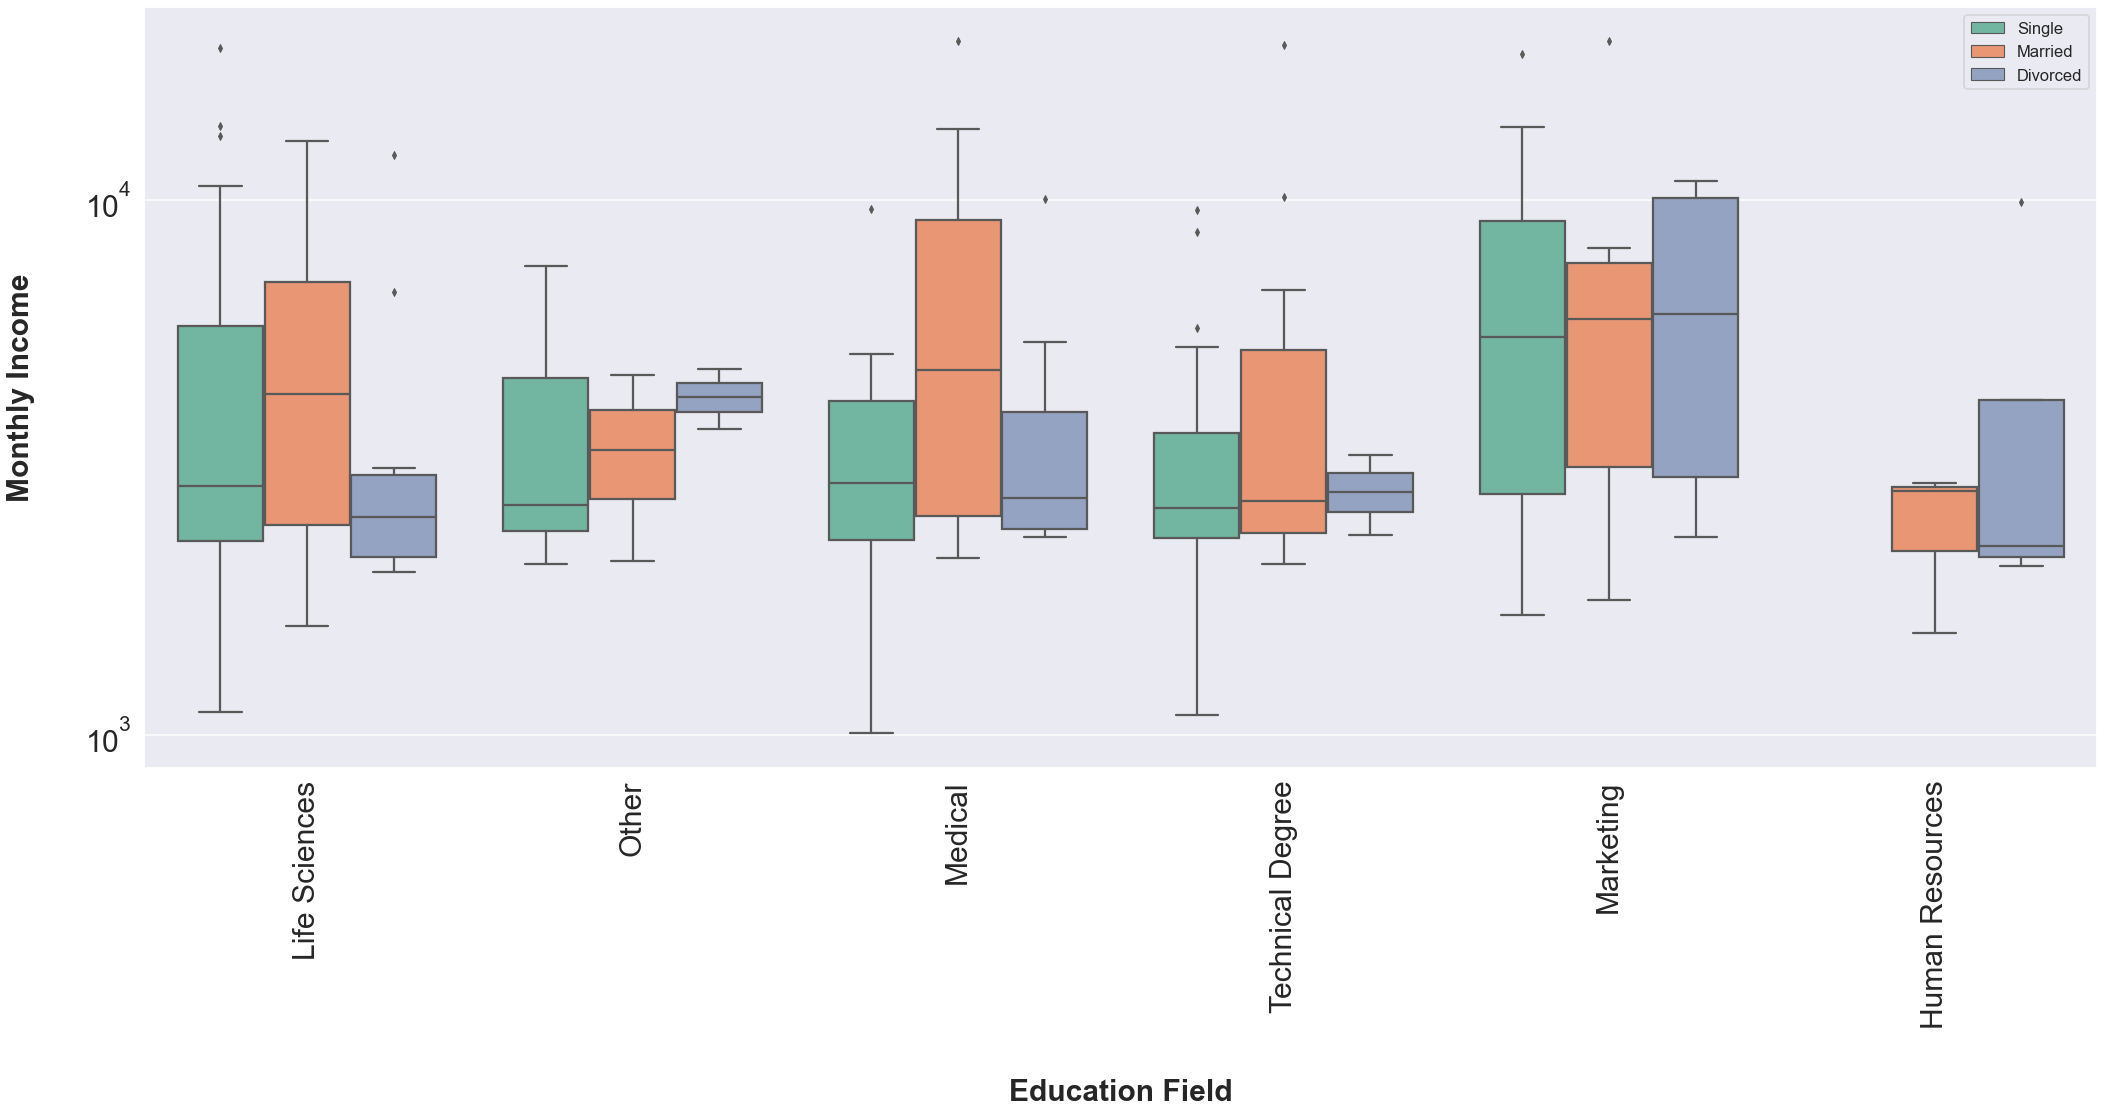

In [52]:
plt.figure(figsize=(35,14))
plt.yscale('log')
sn.boxplot(x='EducationField',y='MonthlyIncome',data=Attrition1,palette='Set2',hue='MaritalStatus',orient='v')
plt.legend(loc='upper right')
plt.xlabel('Education Field',fontsize=30,fontweight='bold')
plt.ylabel('Monthly Income',fontsize=30,fontweight='bold')
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=360,fontsize=30)
plt.show()

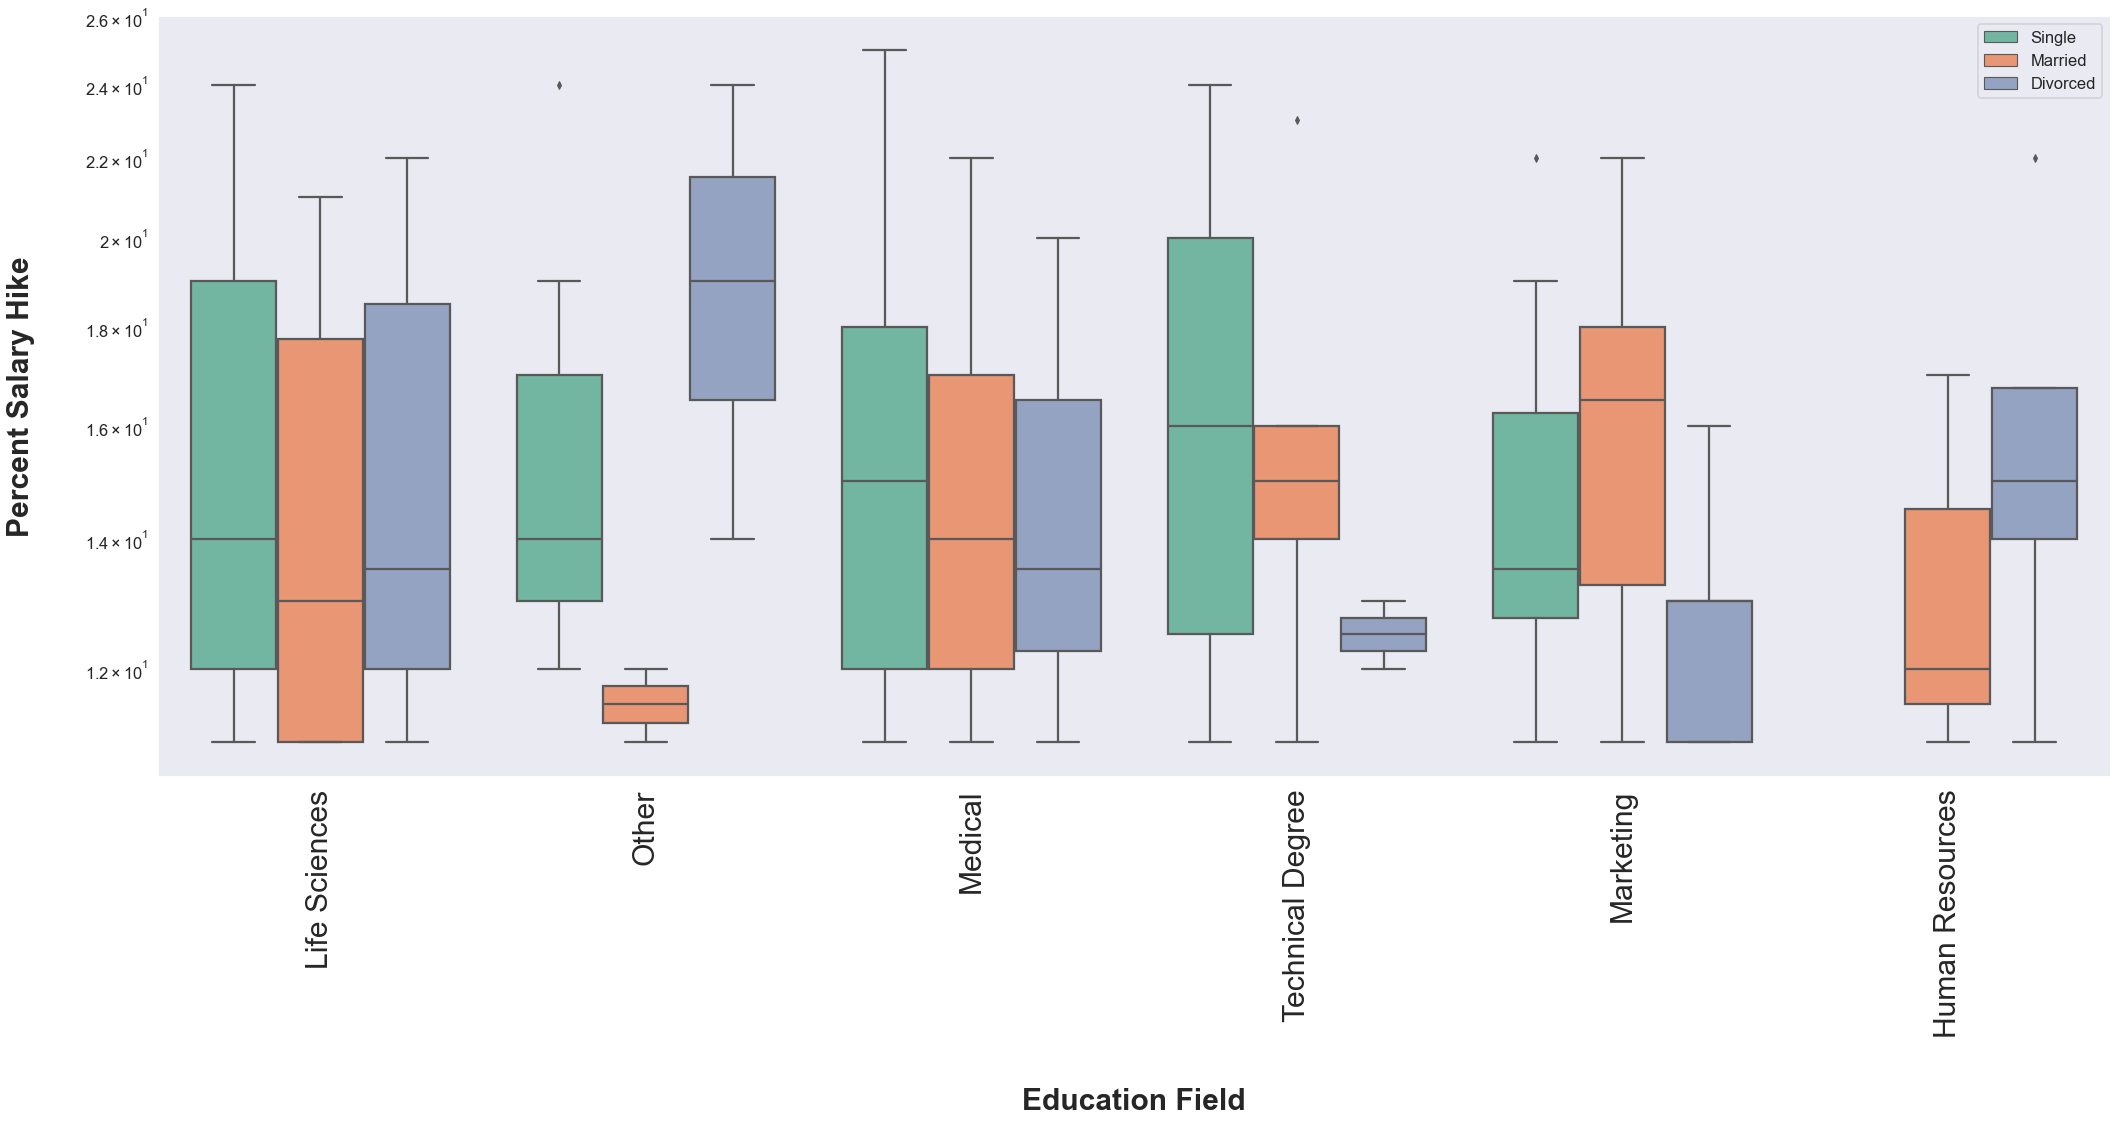

In [53]:
plt.figure(figsize=(35,14))
plt.yscale('log')
sn.boxplot(x='EducationField',y='PercentSalaryHike',data=Attrition1,palette='Set2',hue='MaritalStatus',orient='v')
plt.legend(loc='upper right')
plt.xlabel('Education Field',fontsize=30,fontweight='bold')
plt.ylabel('Percent Salary Hike',fontsize=30,fontweight='bold')
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=360,fontsize=30)
plt.show()

In [54]:
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  StandardHours  StockOptionLevel  TotalWorkingYears  \
0  ...             80                 0                  8   
1  ...             80                 1                 10   
2  ...             80                 0                  7   
3  ...             80                 0                  8   
4  ...             80                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                      0                1              6                   4   
1                      3                3             10                   7   
2                      3                3              0                   0   
3                      3                3              8                   7   
4                      3                3              2                   2   

  YearsSinceLastPromotion  YearsWithCurrManager   Age_Group  
0                       0                     5  Middle_Age  
1                       1                     7  Middle_Age  
2                       0                     0  Middle_Age  
3                       3                     0       Young  
4                       2                     2       Young  

[5 rows x 36 columns]

In [55]:
df.drop(['EmployeeCount','StandardHours'],axis=1,inplace=True)

In [56]:
numerical_cols=list(df.select_dtypes(include='number').columns)
numerical_cols

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

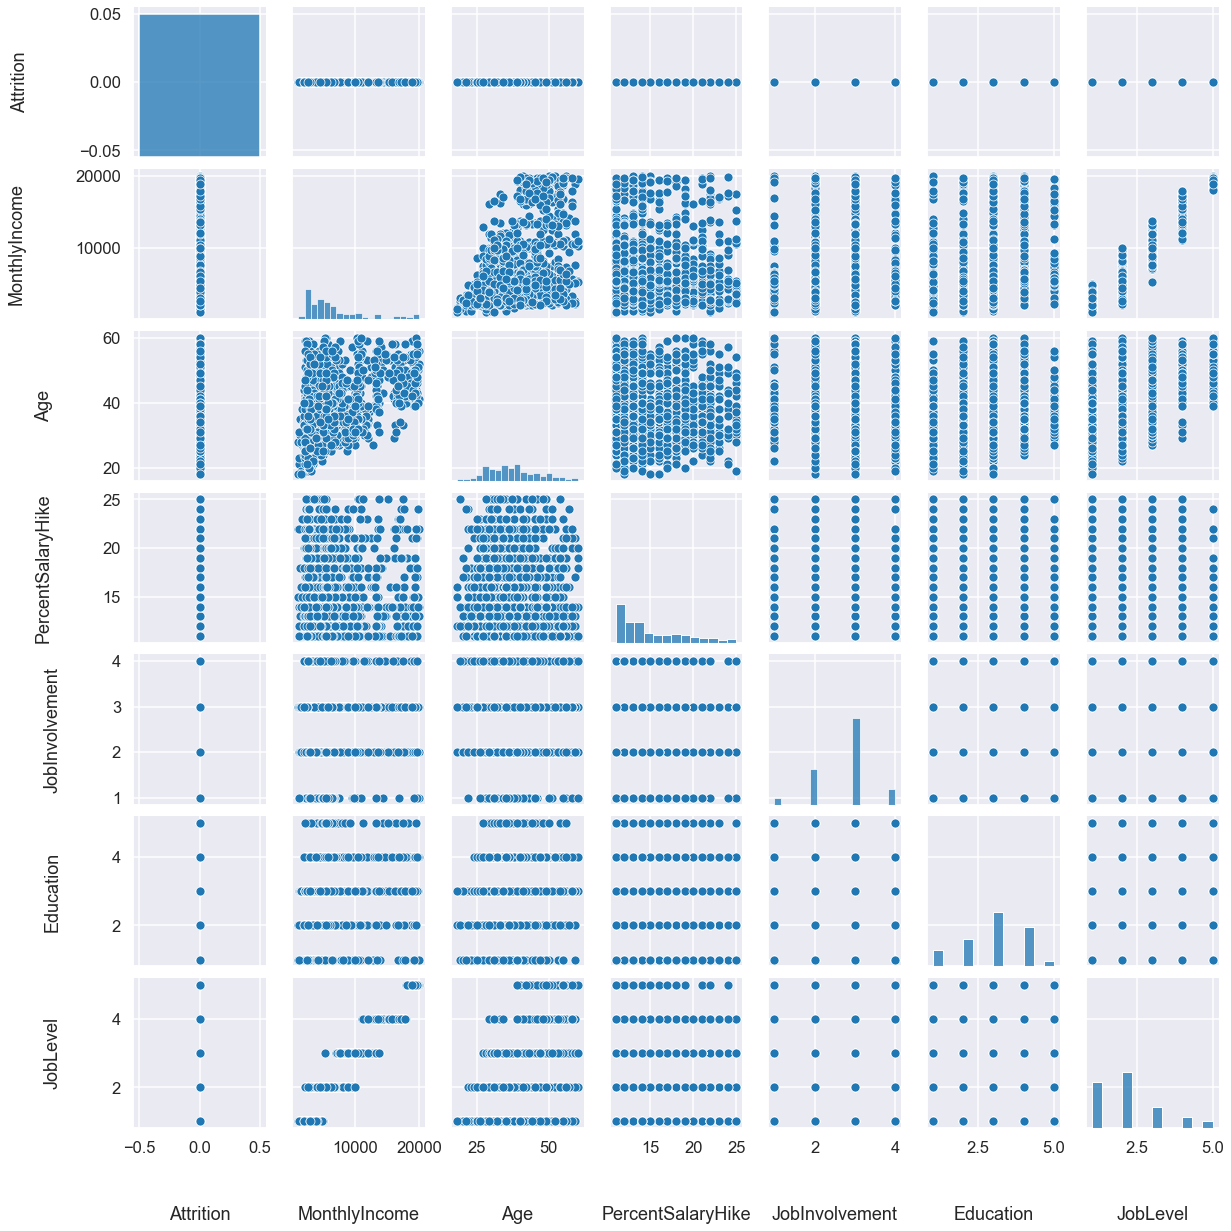

In [57]:
pair=Attrition0[['Attrition','MonthlyIncome','Age','PercentSalaryHike','JobInvolvement','Education','JobLevel']].fillna(0)
sn.pairplot(pair)
plt.show()


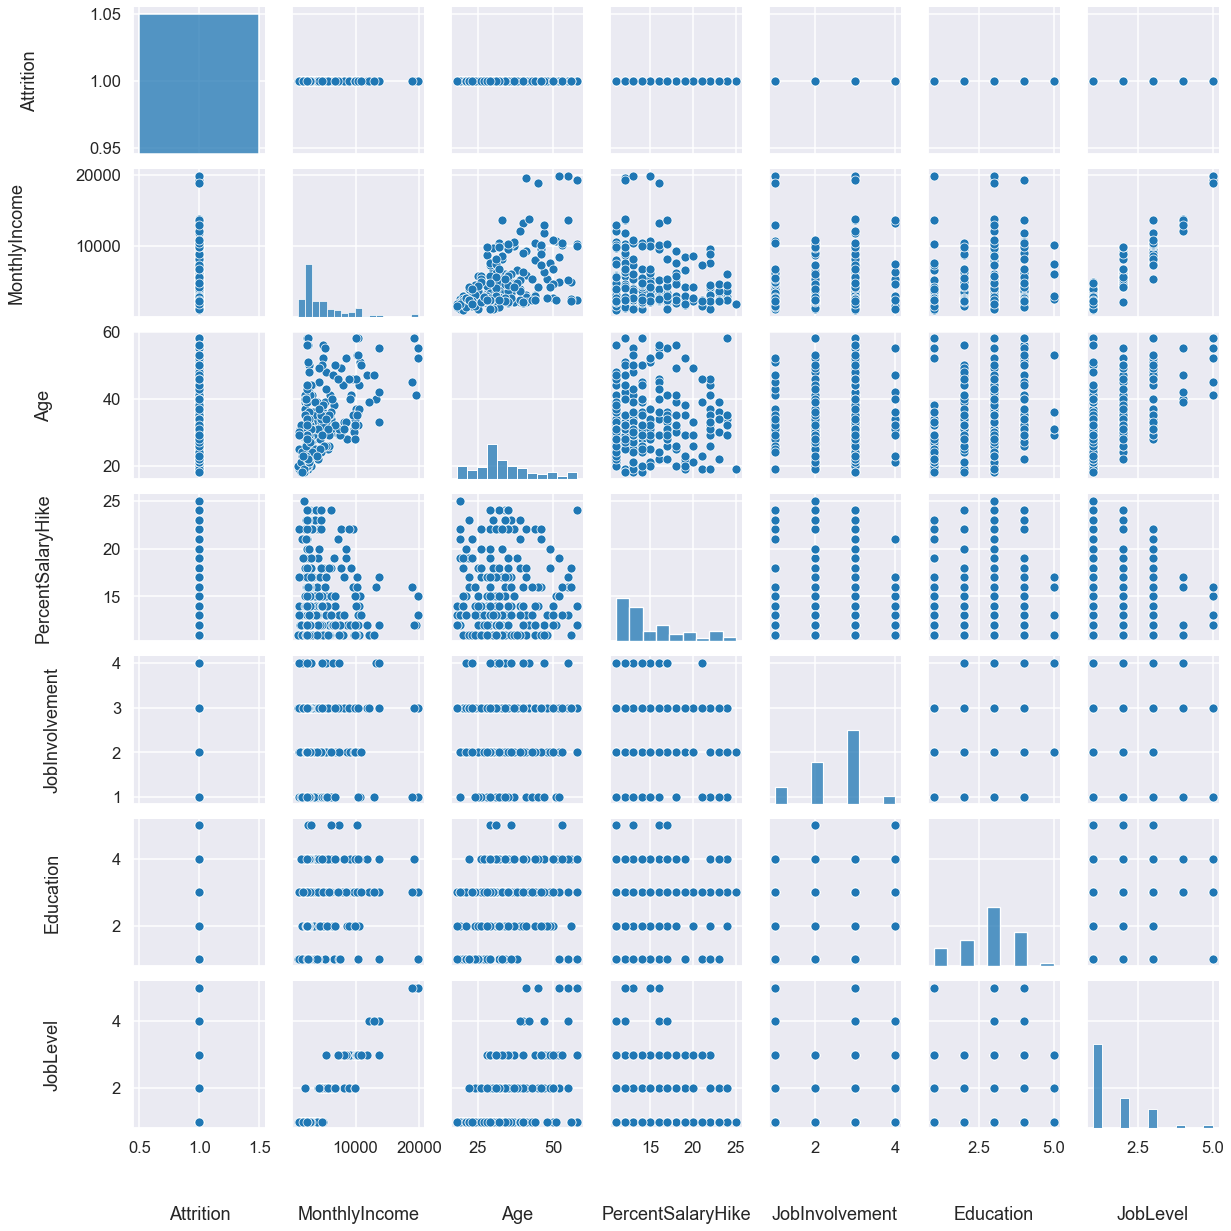

In [58]:
pair=Attrition1[['Attrition','MonthlyIncome','Age','PercentSalaryHike','JobInvolvement','Education','JobLevel']].fillna(0)
sn.pairplot(pair)
plt.show()

In [59]:
corr0=df.iloc[:,:]
corr1=df.iloc[:,:]

In [60]:
t0=corr0.corr(method='spearman')
t1=corr1.corr(method='spearman')

In [61]:
def target_corr(data,title):
    plt.figure(figsize=(15,8))
    
    mask=np.zeros_like(data)
    mask[np.triu_indices_from(mask)]=True
    with sn.axes_style('white'):
        sn.heatmap(data,mask=mask,cmap='RdYlGn')

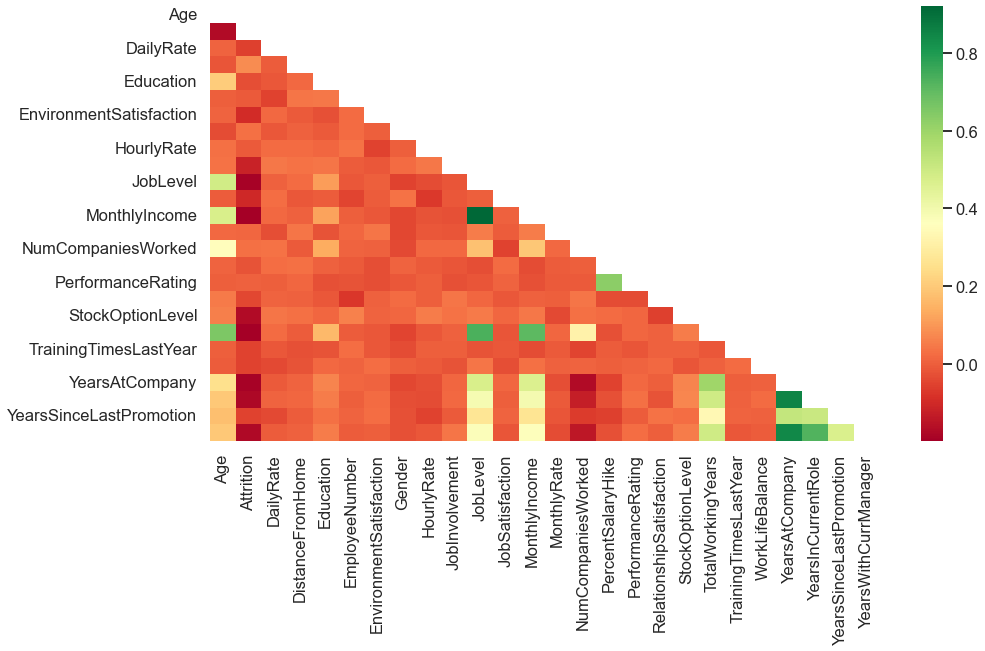

In [62]:
target_corr(t0,'Heatmap for Attrition 0')

In [63]:
def target_corr(data,title):
    plt.figure(figsize=(15,8))
    
    mask=np.zeros_like(data)
    mask[np.triu_indices_from(mask)]=True
    with sn.axes_style('white'):
        sn.heatmap(data,mask=mask,cmap='RdYlGn')

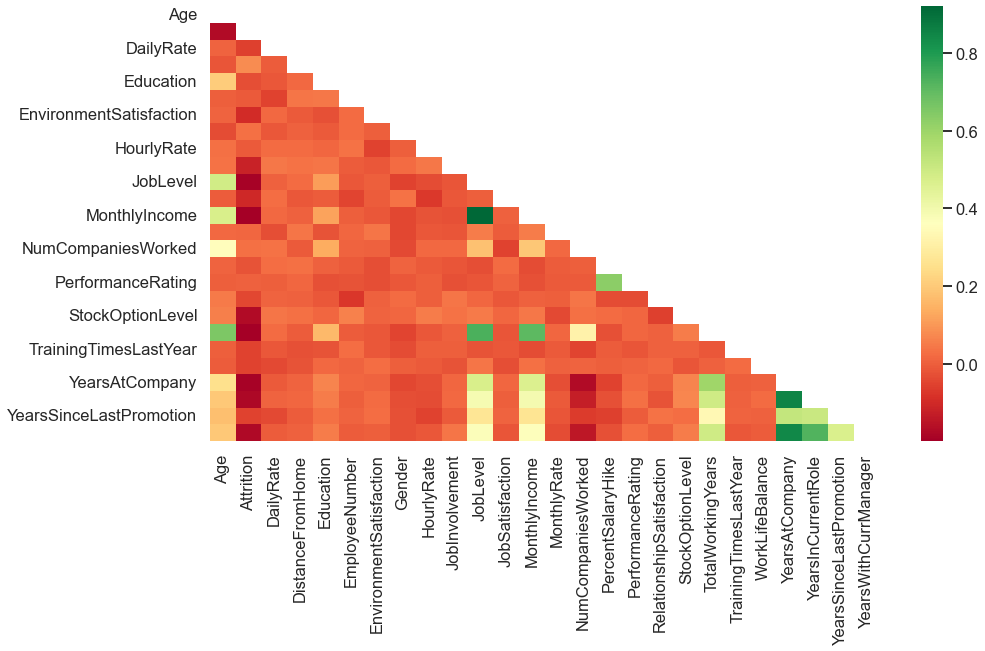

In [64]:
target_corr(t1,'Heatmap for Target 1')

In [65]:
columns=Attrition0.columns
corr=Attrition0[columns].corr(method='pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
top10_corr0=corr.unstack().reset_index()

In [66]:
top10_corr0.columns=['VAR1','VAR2','CORRELATIONS']
top10_corr0.dropna(subset=['CORRELATIONS'],inplace=True)
top10_corr0['CORR_ABS']=np.abs(top10_corr0['CORRELATIONS'])
top10_corr0.sort_values('CORR_ABS',ascending=False).head(10)

VAR1                VAR2  CORRELATIONS  CORR_ABS
375            MonthlyIncome            JobLevel      0.949976  0.949976
599        TotalWorkingYears            JobLevel      0.781068  0.781068
601        TotalWorkingYears       MonthlyIncome      0.771638  0.771638
492        PerformanceRating   PercentSalaryHike      0.769366  0.769366
780     YearsWithCurrManager      YearsAtCompany      0.764309  0.764309
724       YearsInCurrentRole      YearsAtCompany      0.745100  0.745100
781     YearsWithCurrManager  YearsInCurrentRole      0.696231  0.696231
588        TotalWorkingYears                 Age      0.672753  0.672753
752  YearsSinceLastPromotion      YearsAtCompany      0.604951  0.604951
693           YearsAtCompany   TotalWorkingYears      0.594469  0.594469

In [67]:
columns=Attrition1.columns
corr=Attrition1[columns].corr(method='pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
top10_corr1=corr.unstack().reset_index()

In [68]:
top10_corr1.columns=['VAR1','VAR2','CORRELATIONS']
top10_corr1.dropna(subset=['CORRELATIONS'],inplace=True)
top10_corr1['CORR_ABS']=top10_corr1['CORRELATIONS'].abs()
top10_corr1.sort_values('CORR_ABS',ascending=False).head(10)

VAR1                VAR2  CORRELATIONS  CORR_ABS
375            MonthlyIncome            JobLevel      0.945540  0.945540
724       YearsInCurrentRole      YearsAtCompany      0.810889  0.810889
492        PerformanceRating   PercentSalaryHike      0.795337  0.795337
781     YearsWithCurrManager  YearsInCurrentRole      0.781087  0.781087
780     YearsWithCurrManager      YearsAtCompany      0.769296  0.769296
693           YearsAtCompany   TotalWorkingYears      0.767402  0.767402
599        TotalWorkingYears            JobLevel      0.742761  0.742761
601        TotalWorkingYears       MonthlyIncome      0.742277  0.742277
752  YearsSinceLastPromotion      YearsAtCompany      0.702128  0.702128
753  YearsSinceLastPromotion  YearsInCurrentRole      0.691538  0.691538

In [69]:
categorical_cols=list(df.select_dtypes(exclude=[np.number]))

In [70]:
categorical_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Age_Group']

In [71]:
df=pd.get_dummies(columns=categorical_cols,data=df,drop_first=True)
df.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0   41          1       1102                 1          2               1   
1   49          0        279                 8          1               2   
2   37          1       1373                 2          2               4   
3   33          0       1392                 3          4               5   
4   27          0        591                 2          1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  ...  \
0                        2       0          94               3  ...   
1                        3       1          61               2  ...   
2                        4       1          92               2  ...   
3                        4       0          56               3  ...   
4                        1       1          40               3  ...   

   JobRole_Research Director  JobRole_Research Scientist  \
0                          0                           0   
1                          0                           1   
2                          0                           0   
3                          0                           1   
4                          0                           0   

   JobRole_Sales Executive  JobRole_Sales Representative  \
0                        1                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

   MaritalStatus_Married  MaritalStatus_Single  OverTime_Yes  Age_Group_Young  \
0                      0                     1             1                0   
1                      1                     0             0                0   
2                      0                     1             1                0   
3                      1                     0             1                1   
4                      1                     0             0                1   

   Age_Group_Middle_Age  Age_Group_Senior_Citizen  
0                     1                         0  
1                     1                         0  
2                     1                         0  
3                     0                         0  
4                     0                         0  

[5 rows x 49 columns]

In [72]:
X=df.drop('Attrition',axis=1)
Y=df['Attrition']

In [73]:
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_os,Y_os=smote.fit_resample(X,Y)
print('Original Dataset shape:',Counter(Y))
print('Resampled Dataset shape:', Counter(Y_os))

Original Dataset shape: Counter({0: 1233, 1: 237})
Resampled Dataset shape: Counter({1: 1233, 0: 1233})


In [74]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(X_os,Y_os,test_size=0.25,random_state=42)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
trainX=scaler.fit_transform(trainX)
testX=scaler.transform(testX)

In [76]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=300,
                            criterion='entropy',
                             max_features='sqrt',
                             min_samples_leaf=10,random_state=100)
model.fit(trainX,trainY)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=10, n_estimators=300, random_state=100)

In [77]:
predictions=model.predict(testX)

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(testY,predictions))
print(accuracy_score(testY,predictions))
print(classification_report(testY,predictions))

[[288  23]
 [ 44 262]]
0.8914100486223663
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       311
           1       0.92      0.86      0.89       306

    accuracy                           0.89       617
   macro avg       0.89      0.89      0.89       617
weighted avg       0.89      0.89      0.89       617



In [81]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

space={'criterion':hp.choice('criterion',['gini','entropy']),
       'max_depth':hp.quniform('max_depth',10,1200,10),
       'max_features':hp.choice('max_features',['auto','sqrt','log2',None]),
       'min_samples_leaf':hp.uniform('min_samples_leaf',0,0.5),
       'min_samples_split':hp.uniform('min_samples_split',0,1),
       'n_estimators':hp.choice('n_estimators',[10,50,300,750,1200,1300,1500])}
space

{'criterion': <hyperopt.pyll.base.Apply at 0x22506e78508>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x225069e2ec8>,
 'max_features': <hyperopt.pyll.base.Apply at 0x22506d92948>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x22506dbad08>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x22506d97888>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x22506dc4b08>}

In [82]:
from sklearn.model_selection import cross_val_score
def objective(space):
    model=RandomForestClassifier(criterion=space['criterion'],
                                 max_depth=space['max_depth'],
                                 max_features=space['max_features'],
                                 min_samples_leaf=space['min_samples_leaf'],
                                 min_samples_split=space['min_samples_split'],
                                 n_estimators=space['n_estimators'])
    accuracy=cross_val_score(model,trainX,trainY,cv=5).mean()
    return {'loss':-accuracy,'status':STATUS_OK}

In [83]:
trials=Trials()
best=fmin(fn=objective,space=space,algo=tpe.suggest,max_evals=80,trials=trials)
best

100%|███████████████████████████████████████████████| 80/80 [12:16<00:00,  9.20s/trial, best loss: -0.8745169559803706]


{'criterion': 1,
 'max_depth': 1080.0,
 'max_features': 1,
 'min_samples_leaf': 0.011914128025855675,
 'min_samples_split': 0.02750418432902557,
 'n_estimators': 6}

In [84]:
crit={0:'gini',1:'entropy'}
feat={0:'auto',1:'sqrt',2:'log2',3:None}
est={0:10,1:50,2:300,4:750,5:1200,6:1300,7:1500}
print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

entropy
sqrt
1300


In [89]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
criterion=['gini','entropy']
max_features=['sqrt','auto','log2']
max_depth=[int(x) for x in np.linspace(10,1000,10)]
min_samples_split=[2,5,10,14]
min_samples_leaf=[1,2,4,6,8]

param_grid={'n_estimators':n_estimators,
            'criterion':criterion,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

random_search=RandomizedSearchCV(model,param_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)
random_search.fit(trainX,trainY)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_features='sqrt',
                                                    min_samples_leaf=10,
                                                    n_estimators=300,
                                                    random_state=100),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10

In [90]:
random_search.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 890,
 'criterion': 'entropy'}

In [92]:
best_param_grid=random_search.best_estimator_
best_param_grid

RandomForestClassifier(criterion='entropy', max_depth=890, max_features='log2',
                       n_estimators=1600, random_state=100)

In [94]:
param_grid={'criterion':[random_search.best_params_['criterion']],
            'max_depth':[random_search.best_params_['max_depth']],
            'max_features':[random_search.best_params_['max_features']],
            'min_samples_leaf':[random_search.best_params_['min_samples_leaf'],
                               random_search.best_params_['min_samples_leaf']+2,
                               random_search.best_params_['min_samples_leaf']+4],
            'min_samples_split':[random_search.best_params_['min_samples_split']-2,
                                random_search.best_params_['min_samples_split']-1,
                                random_search.best_params_['min_samples_split'],
                                random_search.best_params_['min_samples_split']+1,
                                random_search.best_params_['min_samples_leaf']+2],
            'n_estimators':[random_search.best_params_['n_estimators']-200,
                            random_search.best_params_['n_estimators'],-100,
                            random_search.best_params_['n_estimators'],
                            random_search.best_params_['n_estimators']+100,
                            random_search.best_params_['n_estimators']+200]}

In [95]:
grid_search=GridSearchCV(model,param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(trainX,trainY)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy',
                                              max_features='sqrt',
                                              min_samples_leaf=10,
                                              n_estimators=300,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [890],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 3],
                         'n_estimators': [1400, 1600, -100, 1600, 1700, 1800]},
             verbose=2)

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(X_os,Y_os)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X_os.columns)
featurescores=pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns=['Specs','Scores']
featurescores

Specs         Scores
0                                 Age     261.775740
1                           DailyRate    2742.998548
2                    DistanceFromHome      73.010562
3                           Education      31.451976
4                      EmployeeNumber     111.353659
5             EnvironmentSatisfaction      95.626482
6                              Gender      30.630624
7                          HourlyRate       1.103036
8                      JobInvolvement      58.780312
9                            JobLevel     124.919365
10                    JobSatisfaction      96.410779
11                      MonthlyIncome  458037.295173
12                        MonthlyRate      68.706747
13                 NumCompaniesWorked       0.176273
14                  PercentSalaryHike      15.322367
15                  PerformanceRating       1.849419
16           RelationshipSatisfaction      42.077689
17                   StockOptionLevel     263.596036
18                  TotalWorkingYears     992.976251
19              TrainingTimesLastYear      61.409370
20                    WorkLifeBalance      38.669601
21                     YearsAtCompany     667.503498
22                 YearsInCurrentRole     601.645286
23            YearsSinceLastPromotion     115.135458
24               YearsWithCurrManager     550.962997
25   BusinessTravel_Travel_Frequently      10.858757
26       BusinessTravel_Travel_Rarely      53.300268
27  Department_Research & Development     100.633977
28                   Department_Sales      21.878788
29       EducationField_Life Sciences     103.978780
30           EducationField_Marketing      18.417989
31             EducationField_Medical     151.556622
32               EducationField_Other      34.770115
33    EducationField_Technical Degree      24.687943
34            JobRole_Human Resources      12.518519
35      JobRole_Laboratory Technician       5.267806
36                    JobRole_Manager      75.438095
37     JobRole_Manufacturing Director     107.758621
38          JobRole_Research Director      72.200000
39         JobRole_Research Scientist      50.438202
40            JobRole_Sales Executive      18.525727
41       JobRole_Sales Representative       0.457944
42              MaritalStatus_Married     157.363858
43               MaritalStatus_Single       0.069307
44                       OverTime_Yes      30.906593
45                    Age_Group_Young      20.213192
46               Age_Group_Middle_Age     210.689038
47           Age_Group_Senior_Citizen            NaN

In [75]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X_os,Y_os)
print(model.feature_importances_)

[0.01852118 0.01608371 0.01685267 0.01810937 0.01758452 0.03575726
 0.01586032 0.01592259 0.03170624 0.03558871 0.03639969 0.02231053
 0.01831186 0.01647611 0.01513679 0.00836854 0.02440903 0.0352985
 0.01959285 0.0216759  0.02469619 0.01954933 0.02049157 0.01438013
 0.01866132 0.00889422 0.0241866  0.04248159 0.02006532 0.03787418
 0.00853476 0.0441164  0.00990182 0.01105091 0.00727296 0.00846344
 0.00915217 0.01198168 0.00473583 0.01672644 0.0129589  0.00454519
 0.05021733 0.01350964 0.02112019 0.03217373 0.06229176 0.        ]


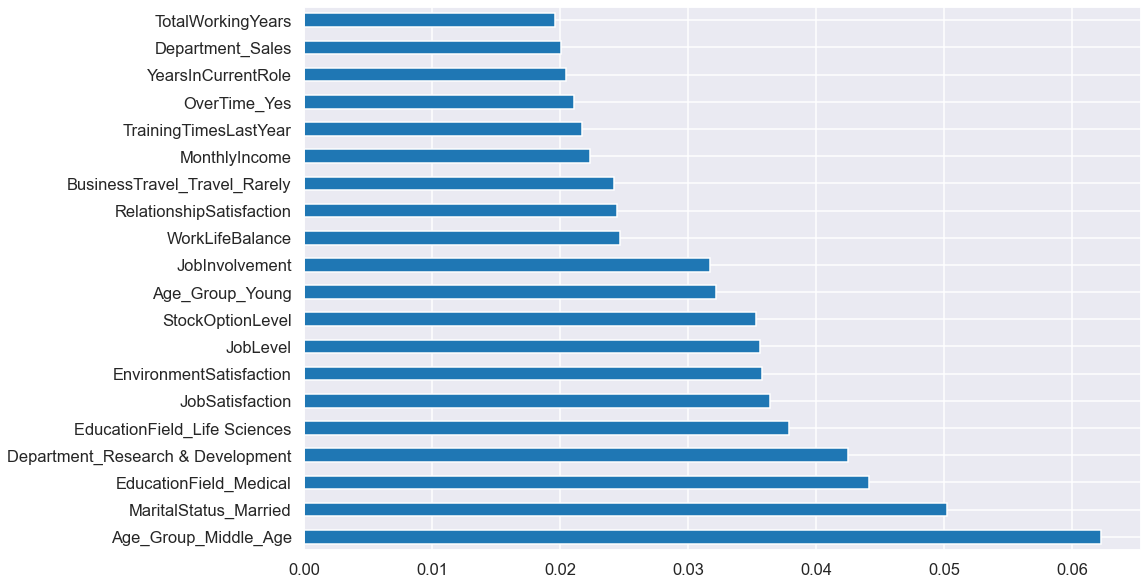

In [76]:
plt.figure(figsize=(15,10))
feat_importance=pd.Series(model.feature_importances_,index=X_os.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

In [77]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
cv=KFold(n_splits=10,shuffle=True,random_state=1)
score=cross_val_score(model,X_os,Y_os,scoring='accuracy',cv=cv,n_jobs=-1)
print('Folds: %i,Accuracy: %.2f std: %.2f'%(len(score),np.mean(np.abs(score)),np.std(score)))

Folds: 10,Accuracy: 0.92 std: 0.01
